<a href="https://colab.research.google.com/github/nattafahhm/Containerized-AI-for-Anomaly-Detection/blob/master/distance_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install ultralytics
# !pip install roboflow

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from roboflow import Roboflow

ModuleNotFoundError: ignored

In [11]:
import random
from io import BytesIO
import requests
from IPython.display import Image, display, clear_output
import pandas as pd
import glob as gb
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image as PILImage
from google.colab import drive
from subprocess import run
import shutil

In [12]:
os.chdir('/content/drive/MyDrive/car-distance')
HOME = os.getcwd()
CLASS_ID = [2, 5, 7]
CUSTOM_TRAIN_MODEL_NAME = 'train7'
CUSTOM_VAL_MODEL_NAME = 'val7'

Sat Aug 12 15:13:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/26_large_90.jpg: 640x640 1 truck, 37.3ms
Speed: 5.4ms preprocess, 37.3ms inference, 28.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 26_large_90.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/26_large_90.jpg
File Name: 26_large_90.jpg
Confidence: 0.9190332889556885
Coordinate: [0.7520751953125, 230.44940185546875, 625.887451171875, 530.3897705078125]



0: 640x640 large 0.99, small 0.01, medium 0.00, 20.9ms
Speed: 29.2ms preprocess, 20.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9897816181182861
Car width: 1.8, Car length: 5
Predicted Distance: 1.7921430949455215
Naive small Distance: 1.6129287854509695
Naive medium Distance: 1.6129287854509695


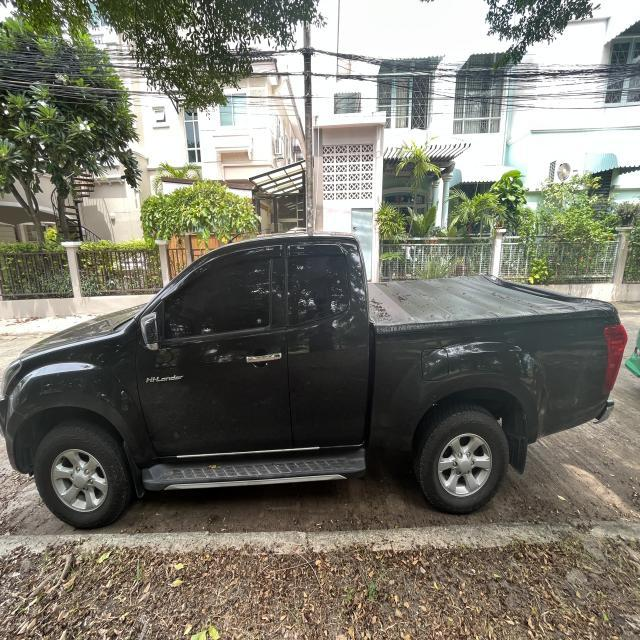

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/33_large_0.jpg: 640x640 1 car, 37.2ms
Speed: 1.4ms preprocess, 37.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 33_large_0.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/33_large_0.jpg
File Name: 33_large_0.jpg
Confidence: 0.9193968176841736
Coordinate: [152.64776611328125, 232.43310546875, 463.4892578125, 562.6356811523438]



0: 640x640 large 1.00, small 0.00, medium 0.00, 20.7ms
Speed: 3.8ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9998952150344849
Car width: 1.8, Car length: 5
Predicted Distance: 1.2975086593338414
Naive small Distance: 1.15334103051897
Naive medium Distance: 1.2975086593338414


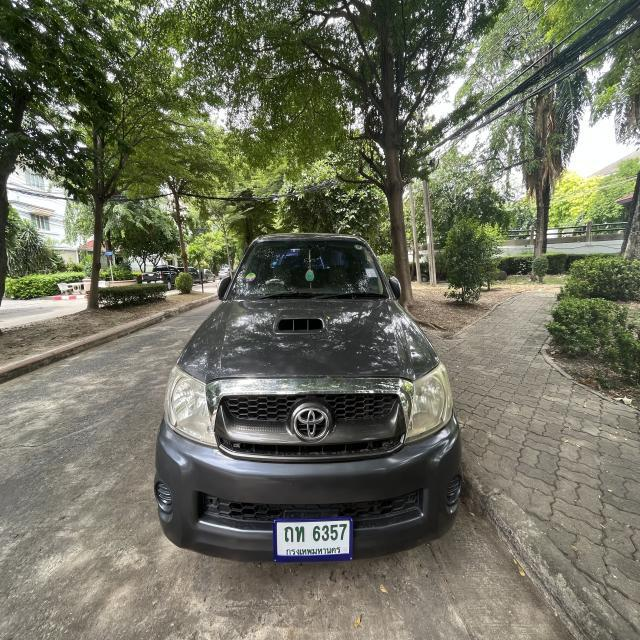

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/27_large_45.jpg: 640x640 1 truck, 1 fire hydrant, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 27_large_45.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/27_large_45.jpg
File Name: 27_large_45.jpg
Confidence: 0.9192984104156494
Coordinate: [185.28387451171875, 199.76211547851562, 434.83154296875, 422.0862121582031]



0: 640x640 large 0.98, small 0.02, medium 0.00, 20.7ms
Speed: 3.3ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9766214489936829
Car width: 1.8, Car length: 5
Predicted Distance: 3.7123594033570497
Naive small Distance: 3.3302047588938235
Naive medium Distance: 3.439391800169031


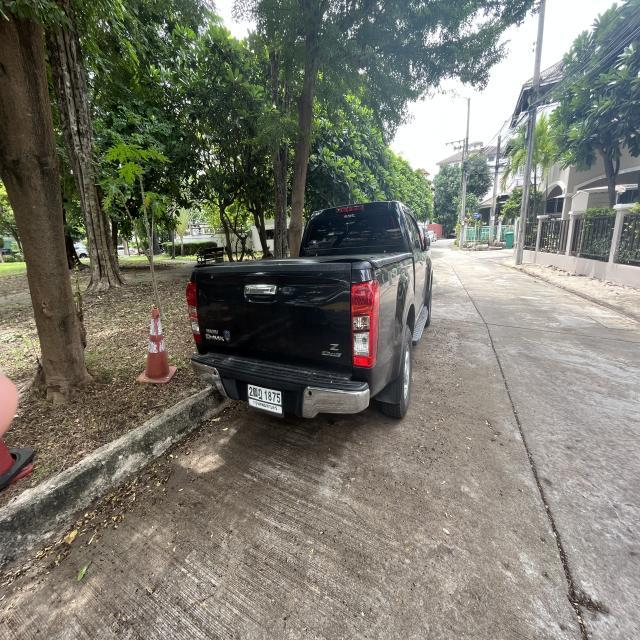

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/25_large_45.jpg: 640x640 6 cars, 2 trucks, 37.6ms
Speed: 1.5ms preprocess, 37.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 25_large_45.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/25_large_45.jpg
File Name: 25_large_45.jpg
Confidence: 0.9343831539154053
Coordinate: [185.9218292236328, 218.5674285888672, 448.17510986328125, 427.49505615234375]



0: 640x640 large 1.00, small 0.00, medium 0.00, 20.7ms
Speed: 3.4ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9999854564666748
Car width: 1.8, Car length: 5
Predicted Distance: 3.53250325270163
Naive small Distance: 3.168863211982345
Naive medium Distance: 3.272760366473569


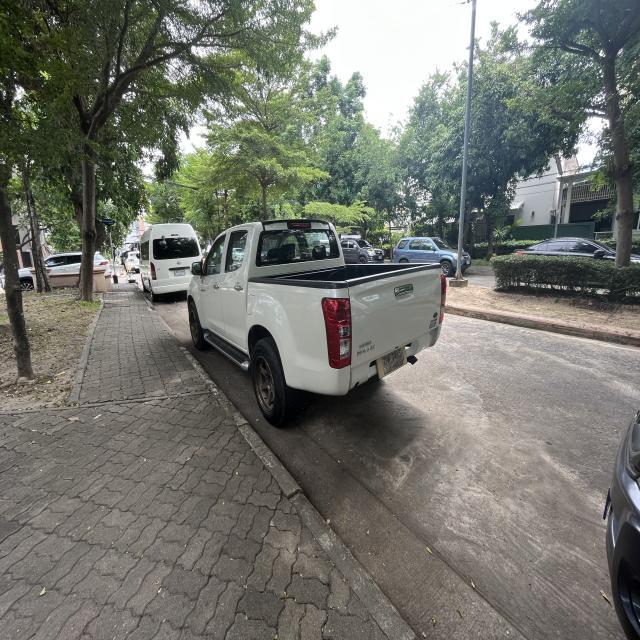

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/28_small_90.jpg: 640x640 5 cars, 37.2ms
Speed: 1.4ms preprocess, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 28_small_90.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/28_small_90.jpg
File Name: 28_small_90.jpg
Confidence: 0.8801383972167969
Coordinate: [9.55908203125, 289.39288330078125, 566.6170654296875, 566.4346313476562]



0: 640x640 small 0.93, medium 0.07, large 0.00, 20.3ms
Speed: 3.5ms preprocess, 20.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.9261555075645447
Car width: 1.6, Car length: 4.5
Predicted Distance: 1.8100428882845072
Naive small Distance: 1.8100428882845072
Naive medium Distance: 1.8100428882845072


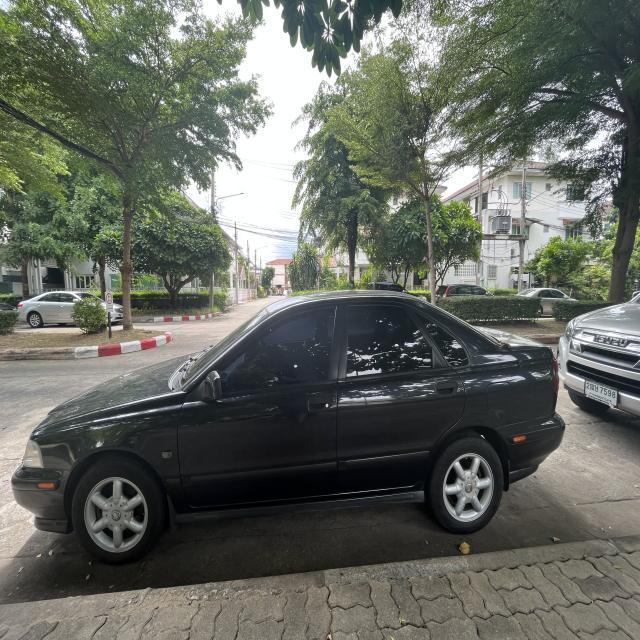

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/29_small_90.jpg: 640x640 7 cars, 36.4ms
Speed: 1.6ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 29_small_90.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/29_small_90.jpg
File Name: 29_small_90.jpg
Confidence: 0.9306795001029968
Coordinate: [0.9752197265625, 263.7296142578125, 639.0057373046875, 635.7420654296875]



0: 640x640 small 1.00, medium 0.00, large 0.00, 19.4ms
Speed: 3.8ms preprocess, 19.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.9998225569725037
Car width: 1.6, Car length: 4.5
Predicted Distance: 1.5803301555328522
Naive small Distance: 1.5803301555328522
Naive medium Distance: 1.5803301555328522


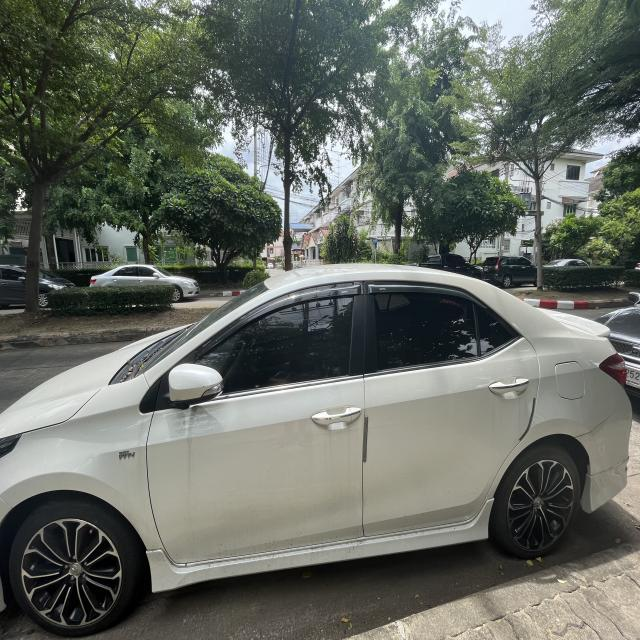

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/31_large_0.jpg: 640x640 3 cars, 1 truck, 35.0ms
Speed: 1.4ms preprocess, 35.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 31_large_0.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/31_large_0.jpg
File Name: 31_large_0.jpg
Confidence: 0.9115771055221558
Coordinate: [70.64190673828125, 172.899658203125, 483.77703857421875, 460.12408447265625]



0: 640x640 large 1.00, medium 0.00, small 0.00, 20.8ms
Speed: 3.6ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9999991655349731
Car width: 1.8, Car length: 5
Predicted Distance: 0.9762411763923753
Naive small Distance: 0.8677699345710003
Naive medium Distance: 0.9762411763923753


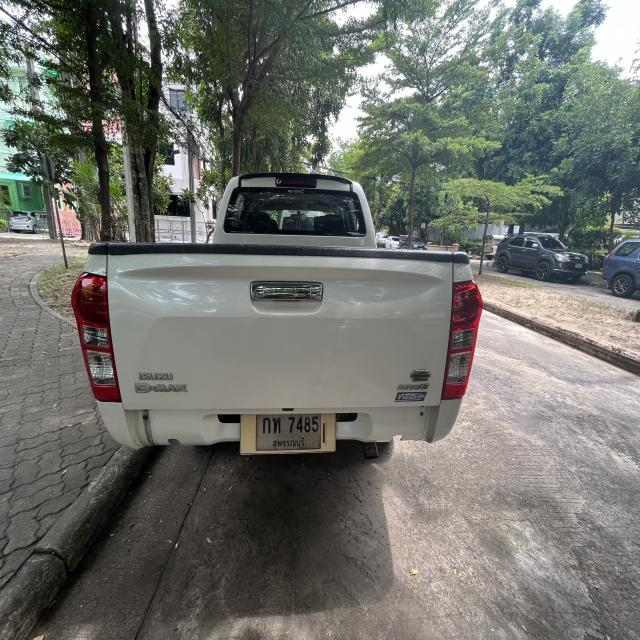

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/30_small_0.jpg: 640x640 3 cars, 37.2ms
Speed: 1.4ms preprocess, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 30_small_0.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/30_small_0.jpg
File Name: 30_small_0.jpg
Confidence: 0.9573900103569031
Coordinate: [187.998779296875, 239.677734375, 477.6334228515625, 523.6453247070312]



0: 640x640 small 1.00, medium 0.00, large 0.00, 19.6ms
Speed: 3.6ms preprocess, 19.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.9999929666519165
Car width: 1.6, Car length: 4.5
Predicted Distance: 1.2377878918130656
Naive small Distance: 1.2377878918130656
Naive medium Distance: 1.3925113782896987


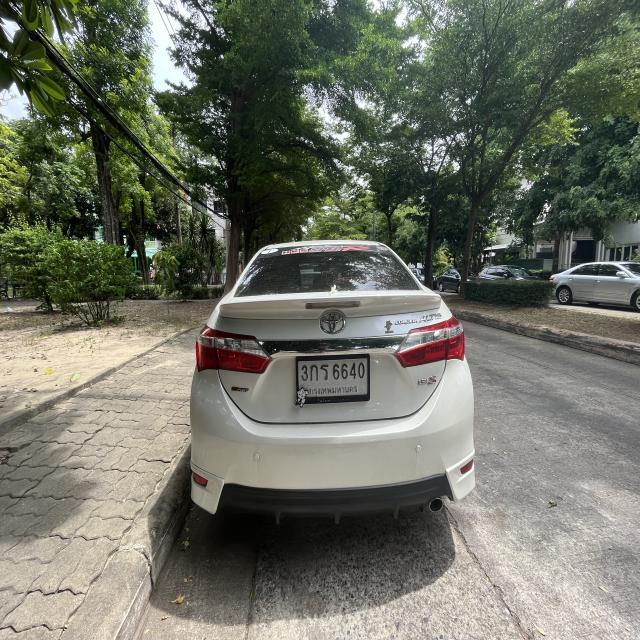

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/14_small_45.jpg: 640x640 3 cars, 34.9ms
Speed: 1.5ms preprocess, 34.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 14_small_45.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/14_small_45.jpg
File Name: 14_small_45.jpg
Confidence: 0.9478791356086731
Coordinate: [136.86346435546875, 222.64979553222656, 435.21502685546875, 560.0355224609375]



0: 640x640 small 1.00, large 0.00, medium 0.00, 20.7ms
Speed: 3.6ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.9957215785980225
Car width: 1.6, Car length: 4.5
Predicted Distance: 2.785454873872783
Naive small Distance: 2.785454873872783
Naive medium Distance: 2.8767812631800873


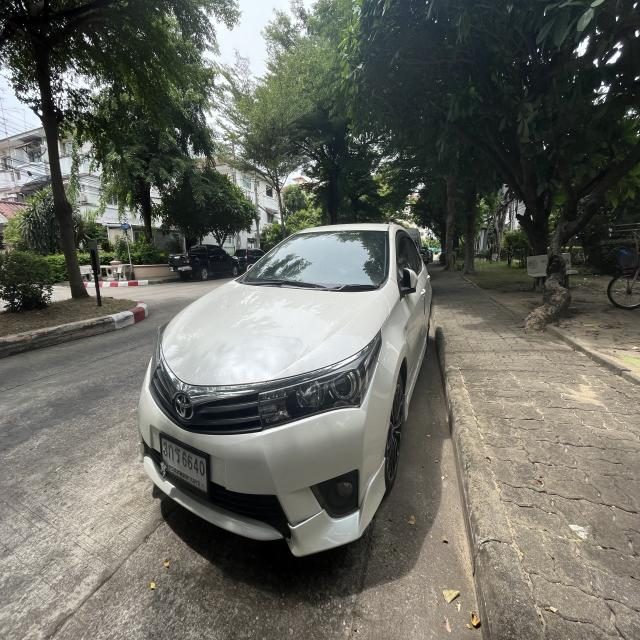

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/15_medium_45.jpg: 640x640 3 cars, 37.3ms
Speed: 1.4ms preprocess, 37.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 15_medium_45.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/15_medium_45.jpg
File Name: 15_medium_45.jpg
Confidence: 0.9431642889976501
Coordinate: [149.23724365234375, 273.5047607421875, 418.0130615234375, 538.71484375]



0: 640x640 large 0.75, small 0.25, medium 0.00, 19.8ms
Speed: 3.7ms preprocess, 19.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.7489789128303528
Car width: 1.8, Car length: 5
Predicted Distance: 3.4467781692000856
Naive small Distance: 3.091962769429488
Naive medium Distance: 3.1933385979353726


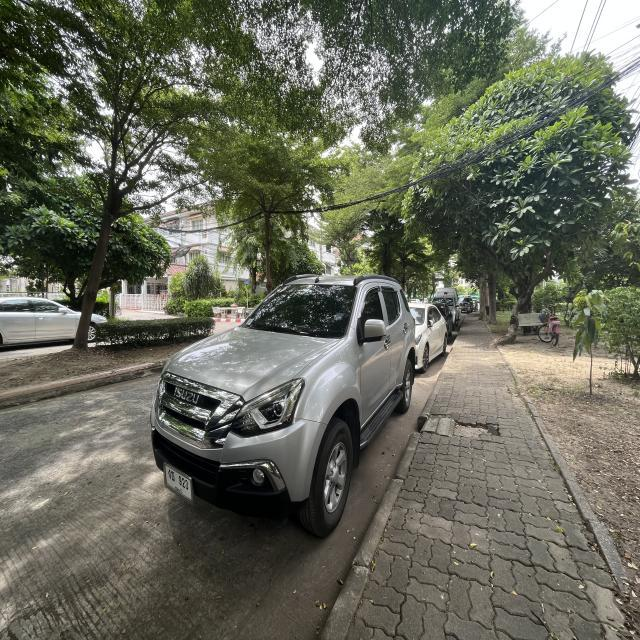

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/16_medium_90.jpg: 640x640 6 cars, 1 truck, 35.6ms
Speed: 1.5ms preprocess, 35.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 16_medium_90.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/16_medium_90.jpg
File Name: 16_medium_90.jpg
Confidence: 0.9351213574409485
Coordinate: [88.1468505859375, 188.18223571777344, 527.4452514648438, 437.520263671875]



0: 640x640 large 0.98, medium 0.02, small 0.00, 20.7ms
Speed: 3.4ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.984216034412384
Car width: 1.8, Car length: 5
Predicted Distance: 2.5502757553728457
Naive small Distance: 2.295248179835561
Naive medium Distance: 2.295248179835561


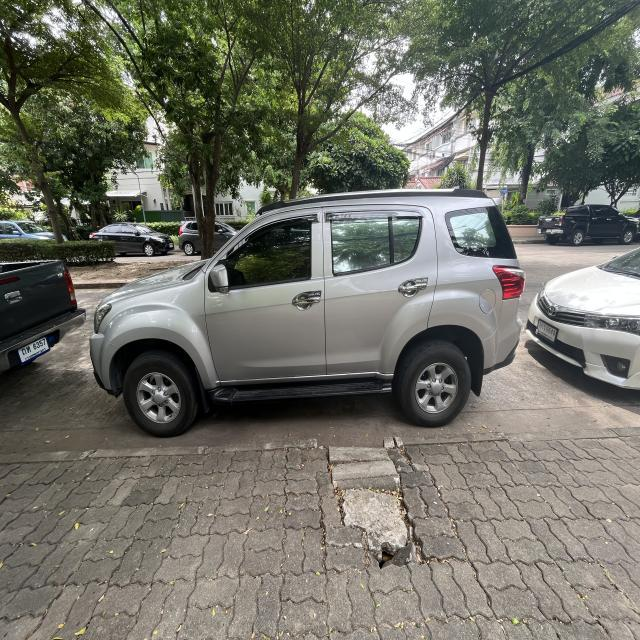

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/32_large_90.jpg: 640x640 1 car, 1 bus, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 32_large_90.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/32_large_90.jpg
File Name: 32_large_90.jpg
Confidence: 0.8799624443054199
Coordinate: [13.2862548828125, 121.92739868164062, 582.9989013671875, 445.7180480957031]



0: 640x640 large 0.51, medium 0.49, small 0.00, 20.7ms
Speed: 3.3ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.5103391408920288
Car width: 1.8, Car length: 5
Predicted Distance: 1.9664862331072746
Naive small Distance: 1.7698376097965471
Naive medium Distance: 1.7698376097965471


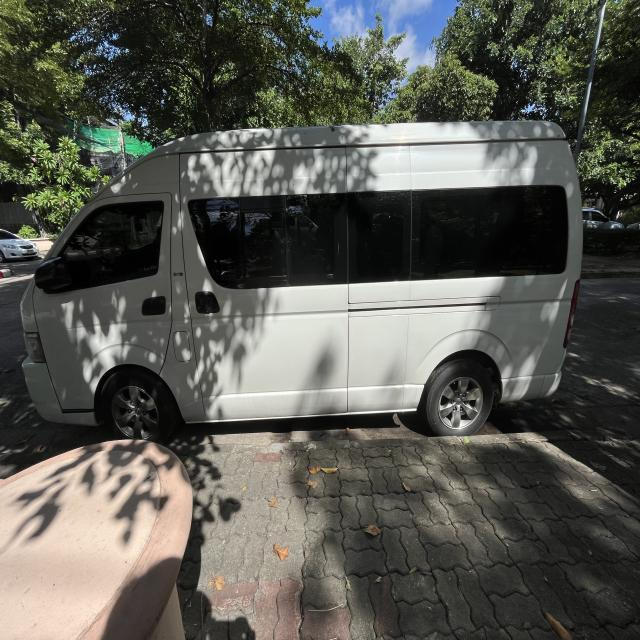

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/17_medium_0.jpg: 640x640 1 car, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 17_medium_0.jpg to /content/drive/MyDrive/car-distance/raw_data/car_images/17_medium_0.jpg
File Name: 17_medium_0.jpg
Confidence: 0.7003186941146851
Coordinate: [238.7362823486328, 193.56581115722656, 386.03741455078125, 371.1602783203125]



0: 640x640 small 0.69, large 0.31, medium 0.00, 20.7ms
Speed: 4.3ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.6881136298179626
Car width: 1.6, Car length: 4.5
Predicted Distance: 2.4338323734914873
Naive small Distance: 2.4338323734914873
Naive medium Distance: 2.738061420177923


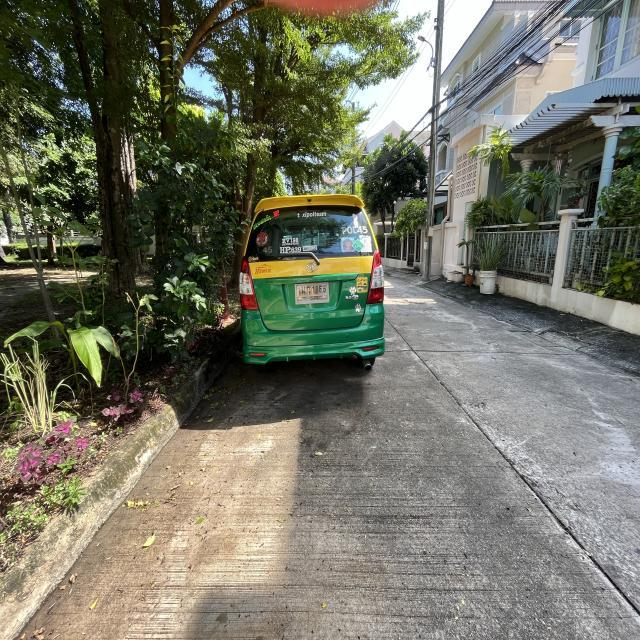

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/23_medium_45.jpeg: 640x640 5 cars, 1 bus, 1 truck, 37.5ms
Speed: 1.5ms preprocess, 37.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 23_medium_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/23_medium_45.jpeg
File Name: 23_medium_45.jpeg
Confidence: 0.6979564428329468
Coordinate: [182.7996368408203, 143.4473876953125, 414.86688232421875, 428.78314208984375]



0: 640x640 large 1.00, small 0.00, medium 0.00, 20.8ms
Speed: 3.6ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9998515844345093
Car width: 1.8, Car length: 5
Predicted Distance: 3.9919923255103664
Naive small Distance: 3.5810519390607696
Naive medium Distance: 3.698463478046369


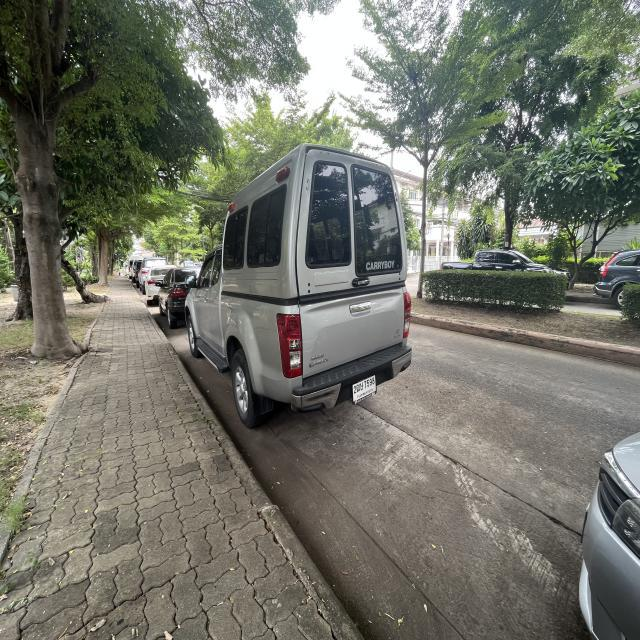

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/24_large_90.jpeg: 640x640 4 cars, 2 trucks, 37.5ms
Speed: 1.4ms preprocess, 37.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 24_large_90.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/24_large_90.jpeg
File Name: 24_large_90.jpeg
Confidence: 0.8574310541152954
Coordinate: [66.76509094238281, 228.70294189453125, 545.0894165039062, 447.24700927734375]



0: 640x640 large 1.00, small 0.00, medium 0.00, 20.8ms
Speed: 3.8ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9994428753852844
Car width: 1.8, Car length: 5
Predicted Distance: 2.3422015770199747
Naive small Distance: 2.1079814193179773
Naive medium Distance: 2.1079814193179773


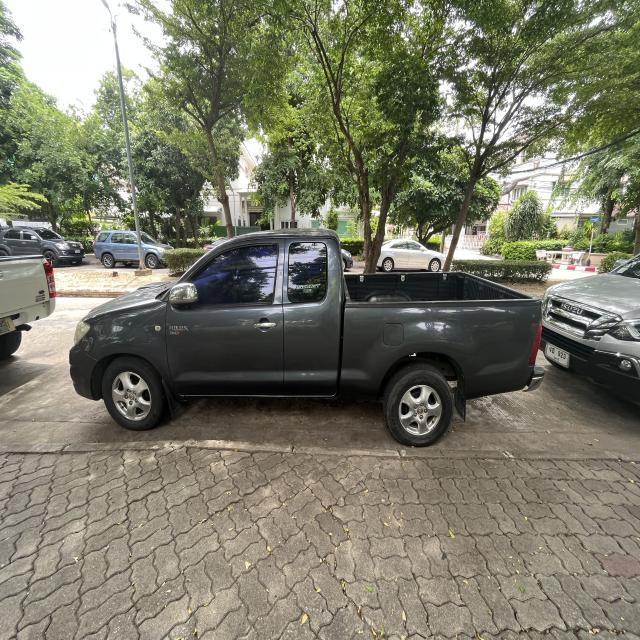

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/20_large_45.jpeg: 640x640 3 cars, 1 bus, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 20_large_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/20_large_45.jpeg
File Name: 20_large_45.jpeg
Confidence: 0.9542784690856934
Coordinate: [142.44439697265625, 29.33447265625, 486.73748779296875, 536.466552734375]



0: 640x640 large 0.99, small 0.01, medium 0.00, 20.7ms
Speed: 3.5ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9938629865646362
Car width: 1.8, Car length: 5
Predicted Distance: 2.6907615979387427
Naive small Distance: 2.4137714334450484
Naive medium Distance: 2.492911480443247


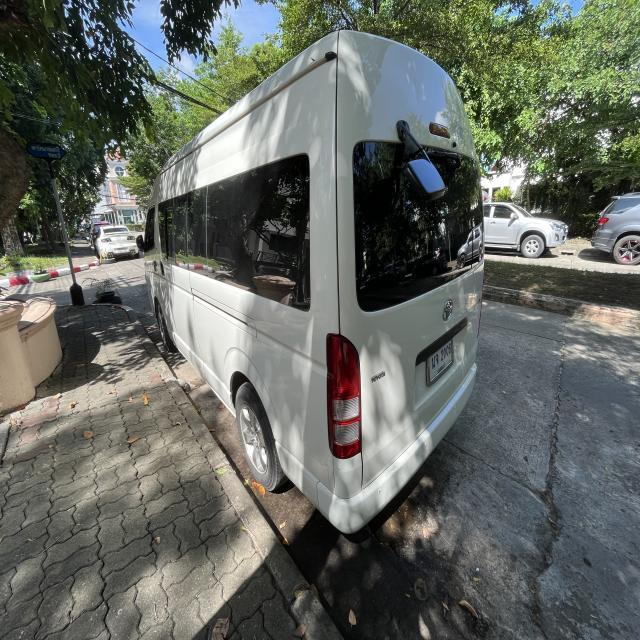

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/19_small_90.jpeg: 640x640 5 cars, 37.2ms
Speed: 1.4ms preprocess, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 19_small_90.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/19_small_90.jpeg
File Name: 19_small_90.jpeg
Confidence: 0.8619329333305359
Coordinate: [135.393798828125, 239.52127075195312, 556.60546875, 435.9718322753906]



0: 640x640 small 0.98, medium 0.02, large 0.00, 20.3ms
Speed: 3.8ms preprocess, 20.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.983173131942749
Car width: 1.6, Car length: 4.5
Predicted Distance: 2.3938056452051435
Naive small Distance: 2.3938056452051435
Naive medium Distance: 2.3938056452051435


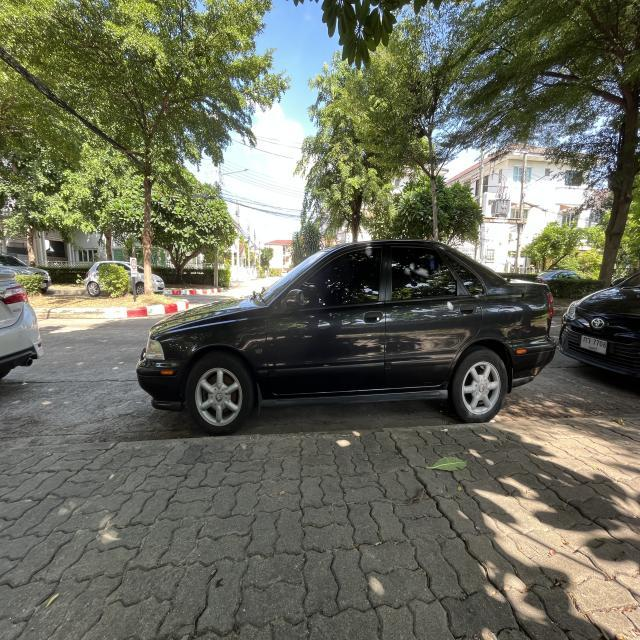

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/18_large_90.jpeg: 640x640 1 car, 1 truck, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 18_large_90.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/18_large_90.jpeg
File Name: 18_large_90.jpeg
Confidence: 0.8808121085166931
Coordinate: [86.93869018554688, 211.45252990722656, 490.6901550292969, 405.6314697265625]



0: 640x640 large 0.78, small 0.21, medium 0.01, 20.6ms
Speed: 3.9ms preprocess, 20.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.7791032195091248
Car width: 1.8, Car length: 5
Predicted Distance: 2.7748060259269387
Naive small Distance: 2.4973254233342446
Naive medium Distance: 2.4973254233342446


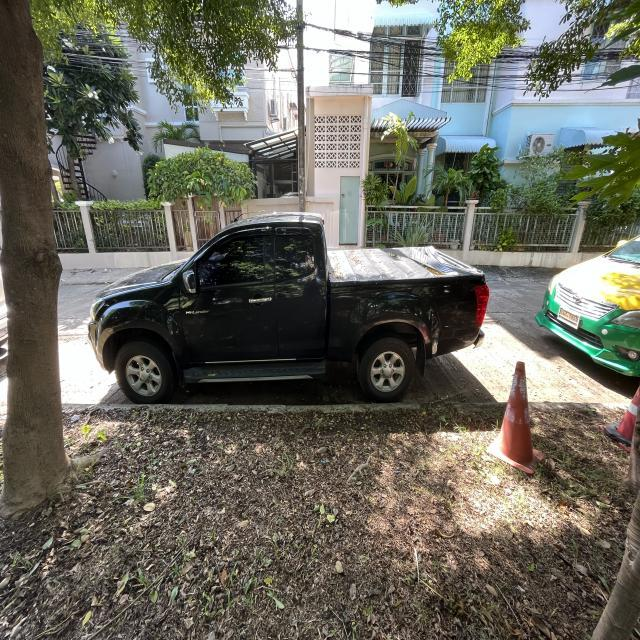

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/21_large_45.jpeg: 640x640 1 car, 1 bus, 1 truck, 37.3ms
Speed: 1.5ms preprocess, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 21_large_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/21_large_45.jpeg
File Name: 21_large_45.jpeg
Confidence: 0.9528136849403381
Coordinate: [215.22763061523438, 109.41641235351562, 459.2148132324219, 394.3299865722656]



0: 640x640 large 0.99, small 0.01, medium 0.00, 20.7ms
Speed: 3.7ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9852302670478821
Car width: 1.8, Car length: 5
Predicted Distance: 3.7969644646522682
Naive small Distance: 3.4061004756439464
Naive medium Distance: 3.517775901074895


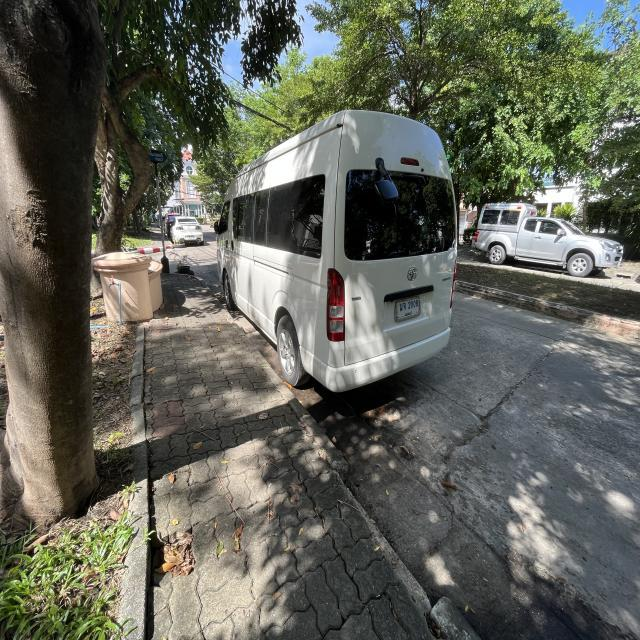

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/22_medium_45.jpeg: 640x640 2 cars, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 22_medium_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/22_medium_45.jpeg
File Name: 22_medium_45.jpeg
Confidence: 0.9518431425094604
Coordinate: [183.974365234375, 164.68226623535156, 432.3751220703125, 392.5029296875]



0: 640x640 small 0.72, large 0.19, medium 0.09, 20.8ms
Speed: 3.9ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.7168666124343872
Car width: 1.6, Car length: 4.5
Predicted Distance: 3.345580870328485
Naive small Distance: 3.345580870328485
Naive medium Distance: 3.4552720464048288


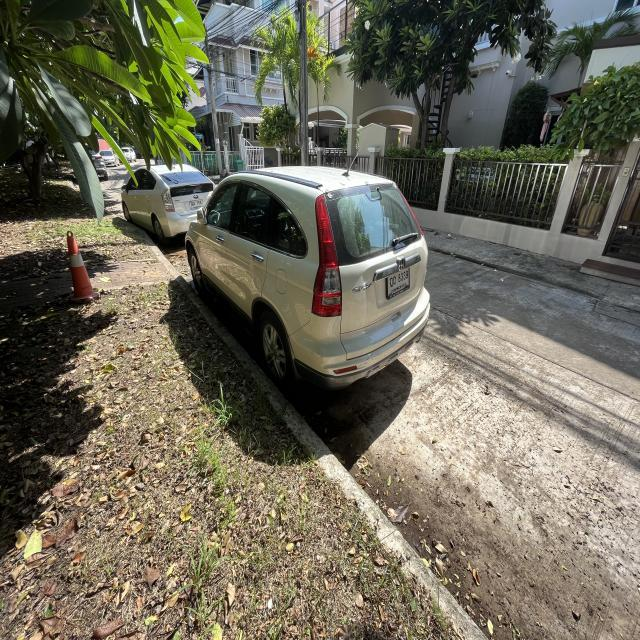

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/20_large_90.jpeg: 640x640 3 cars, 2 trucks, 37.3ms
Speed: 1.4ms preprocess, 37.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 20_large_90.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/20_large_90.jpeg
File Name: 20_large_90.jpeg
Confidence: 0.9253515601158142
Coordinate: [82.07794189453125, 153.43540954589844, 606.4548950195312, 402.7967529296875]



0: 640x640 large 1.00, medium 0.00, small 0.00, 20.8ms
Speed: 4.5ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9999984502792358
Car width: 1.8, Car length: 5
Predicted Distance: 2.1365013674975244
Naive small Distance: 1.9228512307477716
Naive medium Distance: 1.9228512307477716


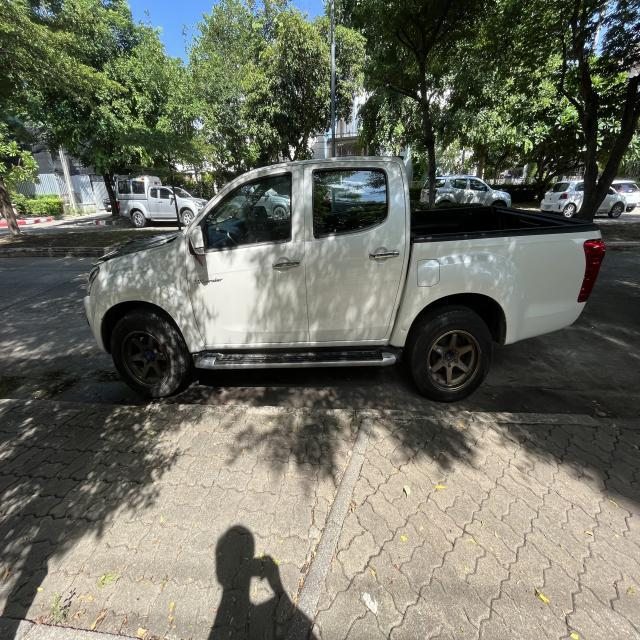

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/01_medium_45.jpeg: 384x640 2 cars, 70.1ms
Speed: 1.6ms preprocess, 70.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 01_medium_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/01_medium_45.jpeg
File Name: 01_medium_45.jpeg
Confidence: 0.9451724886894226
Coordinate: [321.1689453125, 103.94493103027344, 900.9061279296875, 496.299560546875]



0: 640x640 medium 1.00, small 0.00, large 0.00, 20.7ms
Speed: 3.5ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: medium, confidence: 0.9999998807907104
Car width: 1.8, Car length: 4.5
Predicted Distance: 2.96096993469466
Naive small Distance: 2.866970889148798
Naive medium Distance: 2.96096993469466


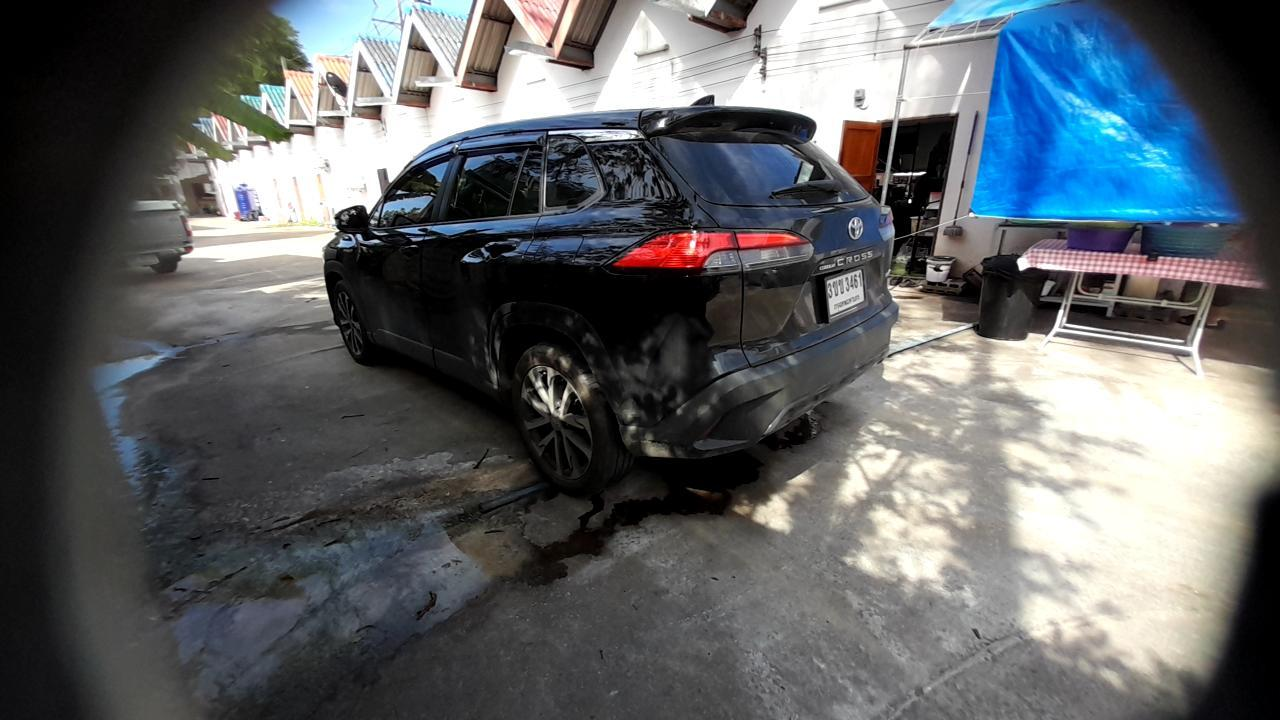

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/02_medium_45.jpeg: 384x640 2 cars, 26.7ms
Speed: 1.7ms preprocess, 26.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 02_medium_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/02_medium_45.jpeg
File Name: 02_medium_45.jpeg
Confidence: 0.9572930932044983
Coordinate: [435.2906494140625, 124.86883544921875, 1151.197021484375, 601.1476440429688]



0: 640x640 medium 1.00, small 0.00, large 0.00, 20.7ms
Speed: 4.0ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: medium, confidence: 0.9987414479255676
Car width: 1.8, Car length: 4.5
Predicted Distance: 2.397777841481078
Naive small Distance: 2.321657910005488
Naive medium Distance: 2.397777841481078


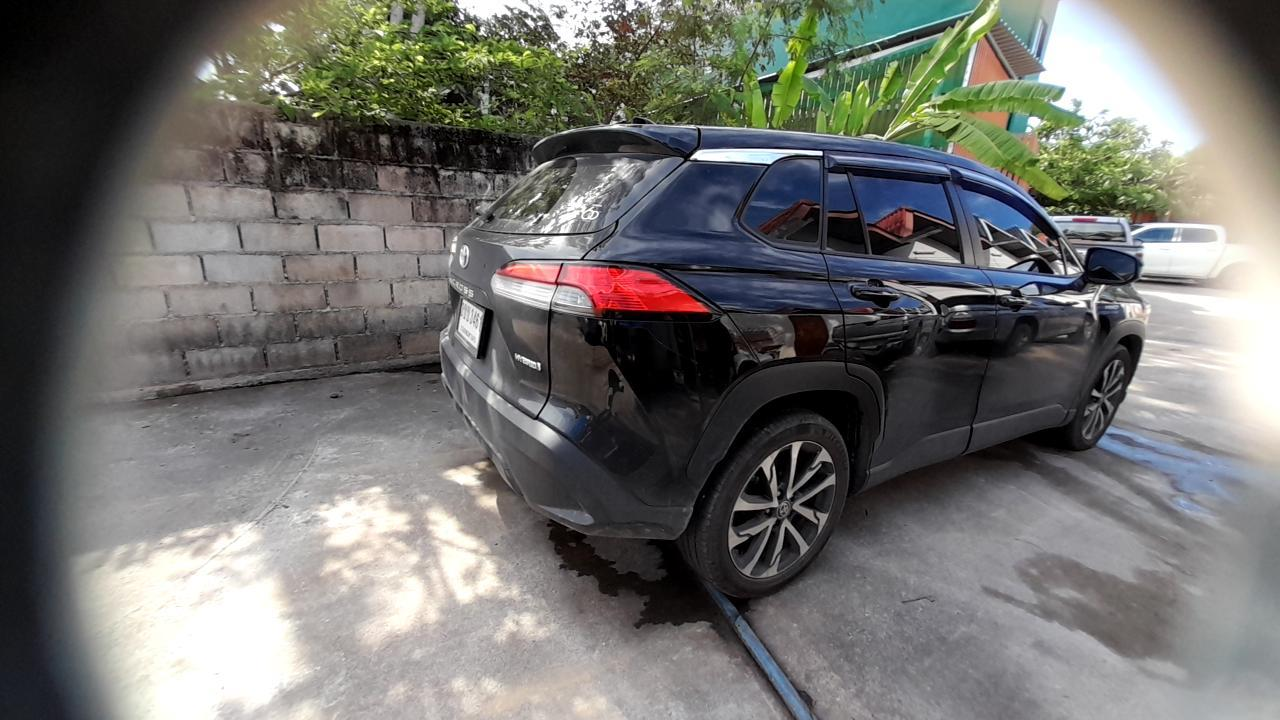

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/03_small_0.jpeg: 384x640 1 car, 1 potted plant, 27.0ms
Speed: 1.6ms preprocess, 27.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 03_small_0.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/03_small_0.jpeg
File Name: 03_small_0.jpeg
Confidence: 0.9691017866134644
Coordinate: [330.3145751953125, 88.16258239746094, 920.549560546875, 589.8262939453125]



0: 640x640 small 0.77, medium 0.23, large 0.00, 20.7ms
Speed: 4.6ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.7665584087371826
Car width: 1.6, Car length: 4.5
Predicted Distance: 1.2147916286251106
Naive small Distance: 1.2147916286251106
Naive medium Distance: 1.3666405822032495


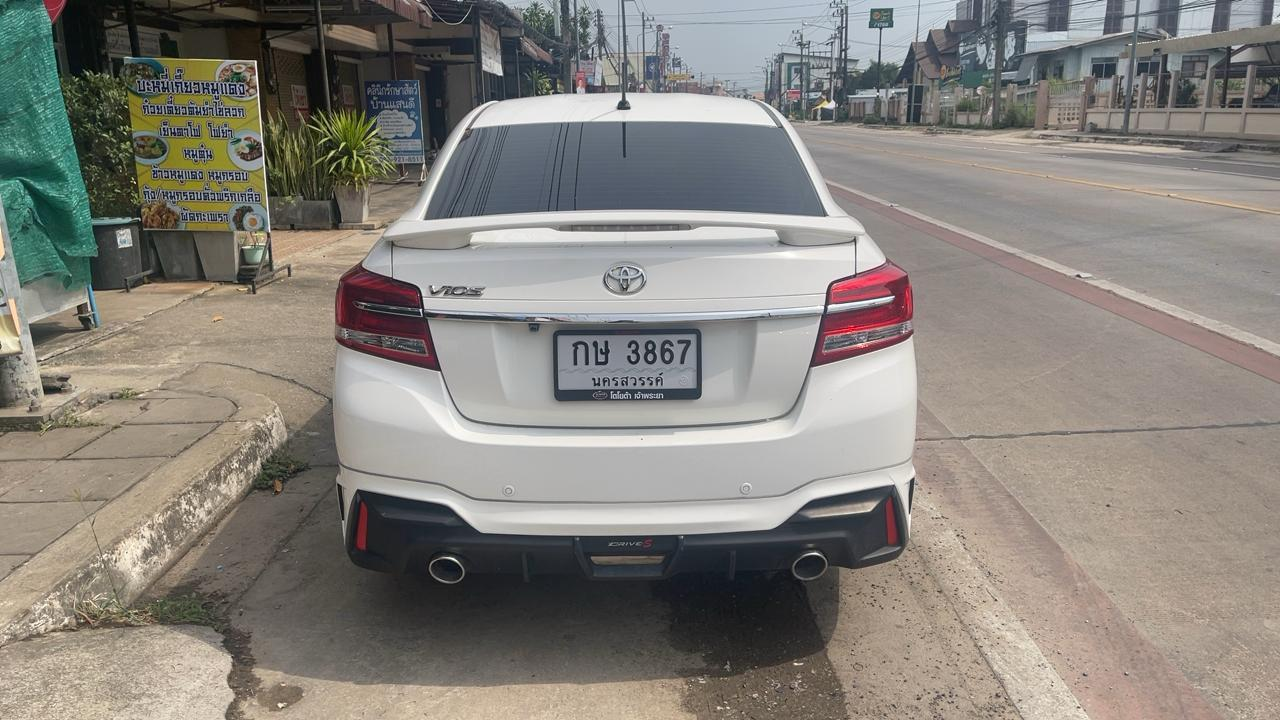

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/04_small_0.jpeg: 384x640 3 cars, 26.8ms
Speed: 1.7ms preprocess, 26.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 04_small_0.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/04_small_0.jpeg
File Name: 04_small_0.jpeg
Confidence: 0.9515979290008545
Coordinate: [35.740966796875, 39.390380859375, 1256.711181640625, 672.4287109375]



0: 640x640 small 1.00, medium 0.00, large 0.00, 20.7ms
Speed: 4.3ms preprocess, 20.7ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.9999984502792358
Car width: 1.6, Car length: 4.5
Predicted Distance: 0.5872481584309611
Naive small Distance: 0.5872481584309611
Naive medium Distance: 0.6606541782348313


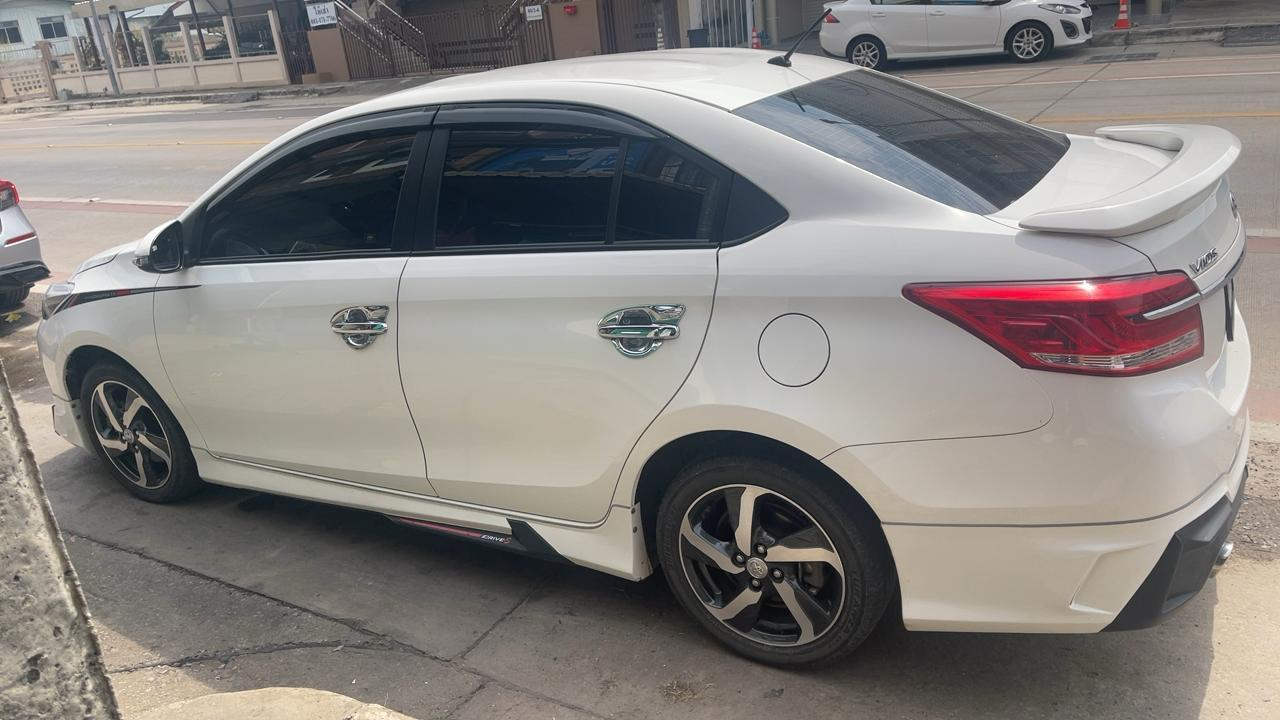

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/05_medium_90.jpeg: 384x640 1 car, 26.9ms
Speed: 1.7ms preprocess, 26.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 05_medium_90.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/05_medium_90.jpeg
File Name: 05_medium_90.jpeg
Confidence: 0.9494557976722717
Coordinate: [41.7674560546875, 114.40673828125, 1222.64501953125, 594.4976806640625]



0: 640x640 medium 0.97, small 0.03, large 0.00, 20.7ms
Speed: 4.2ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: medium, confidence: 0.9676108956336975
Car width: 1.8, Car length: 4.5
Predicted Distance: 1.7077110229228114
Naive small Distance: 1.7077110229228114
Naive medium Distance: 1.7077110229228114


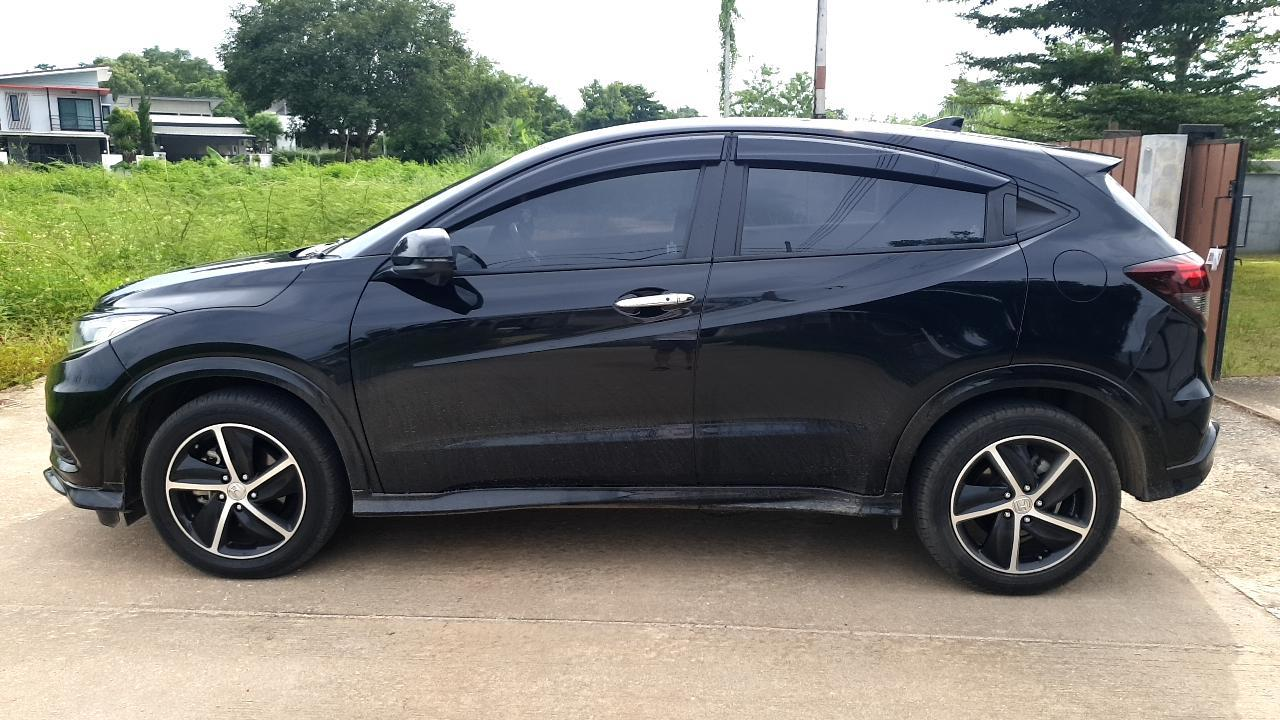

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/06_medium_45.jpeg: 384x640 1 car, 26.5ms
Speed: 1.6ms preprocess, 26.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 06_medium_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/06_medium_45.jpeg
File Name: 06_medium_45.jpeg
Confidence: 0.9521005749702454
Coordinate: [69.23291015625, 27.99932861328125, 1210.290283203125, 712.7901000976562]



0: 640x640 medium 0.99, small 0.01, large 0.00, 20.7ms
Speed: 3.9ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: medium, confidence: 0.9919418096542358
Car width: 1.8, Car length: 4.5
Predicted Distance: 1.504380497447441
Naive small Distance: 1.4566223864173635
Naive medium Distance: 1.504380497447441


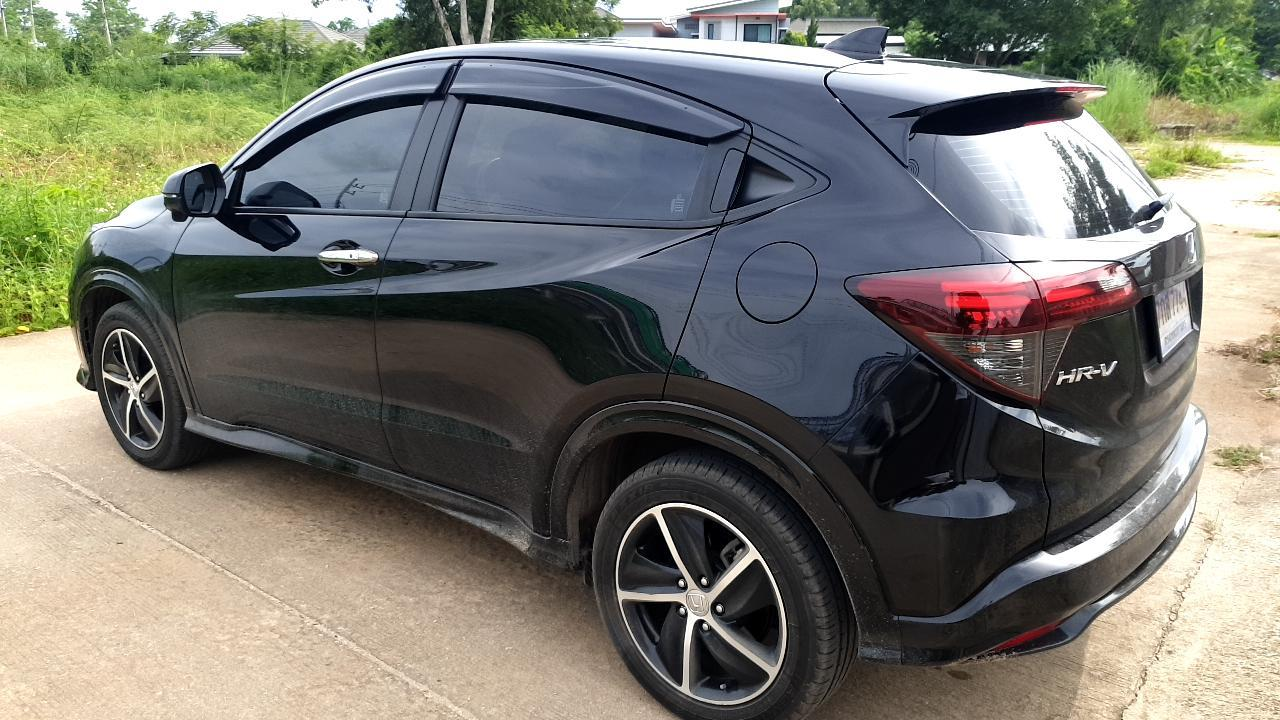

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/07_large_45.jpeg: 384x640 1 car, 1 truck, 1 chair, 1 potted plant, 26.7ms
Speed: 1.7ms preprocess, 26.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 07_large_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/07_large_45.jpeg
File Name: 07_large_45.jpeg
Confidence: 0.7433668971061707
Coordinate: [195.7987060546875, 142.79632568359375, 1043.1666259765625, 597.005859375]



0: 640x640 large 1.00, medium 0.00, small 0.00, 20.7ms
Speed: 4.0ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9999428987503052
Car width: 1.8, Car length: 5
Predicted Distance: 2.186560546561862
Naive small Distance: 1.9614734314746114
Naive medium Distance: 2.025784035785254


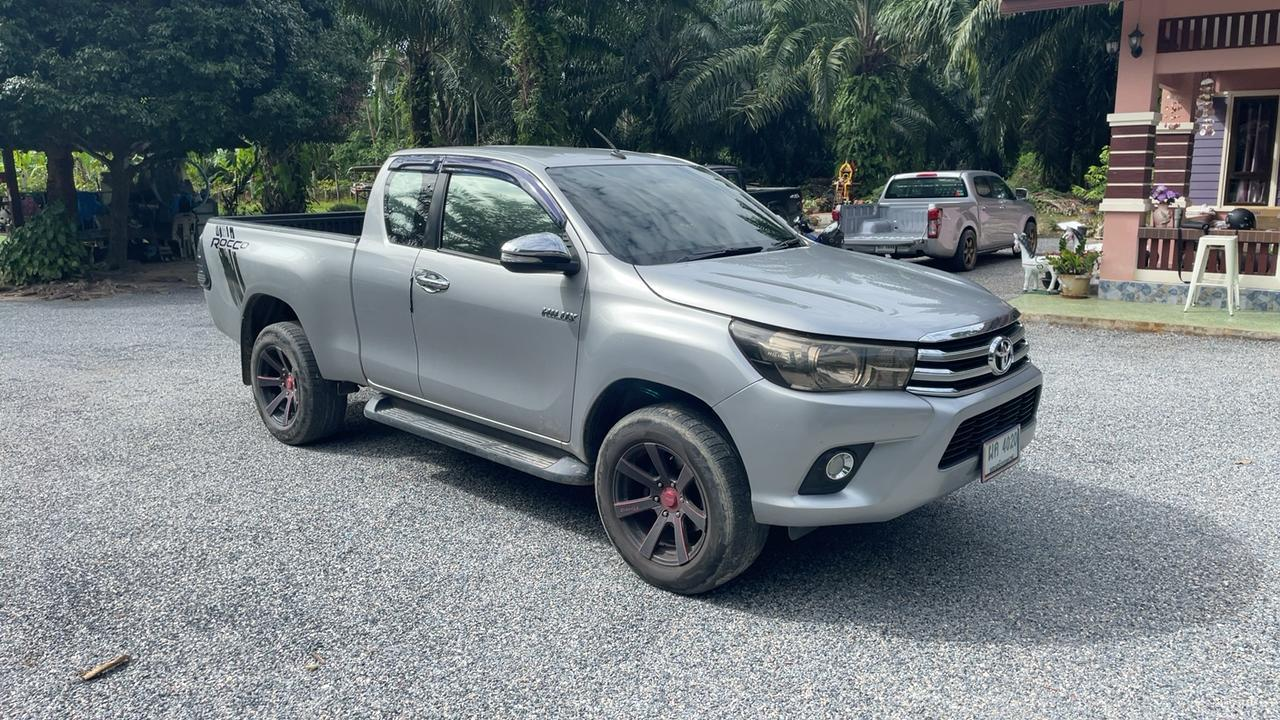

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/08_large_45.jpeg: 384x640 1 truck, 26.8ms
Speed: 1.6ms preprocess, 26.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 08_large_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/08_large_45.jpeg
File Name: 08_large_45.jpeg
Confidence: 0.782052218914032
Coordinate: [328.565673828125, 237.6988525390625, 893.17919921875, 551.5924072265625]



0: 640x640 large 1.00, medium 0.00, small 0.00, 20.9ms
Speed: 3.9ms preprocess, 20.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9999957084655762
Car width: 1.8, Car length: 5
Predicted Distance: 3.281574363932105
Naive small Distance: 2.943765238233212
Naive medium Distance: 3.0402821312900383


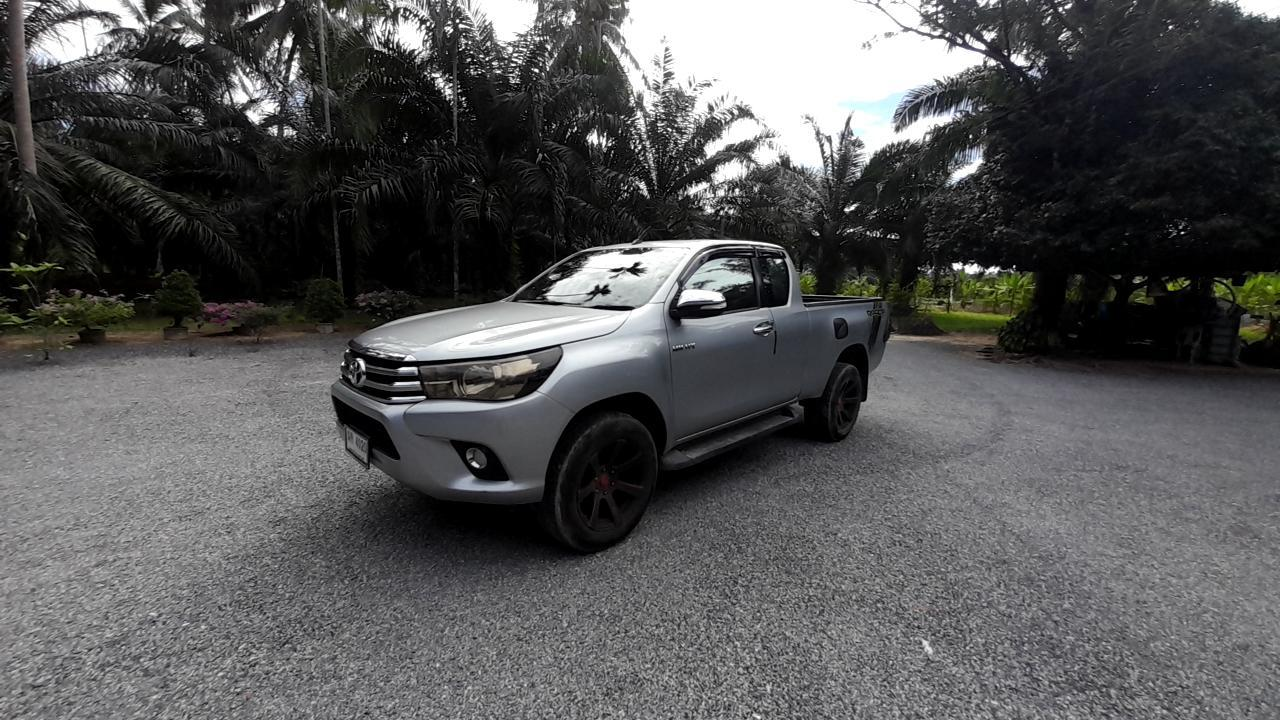

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/09_large_0.jpeg: 384x640 2 cars, 1 bus, 3 trucks, 27.0ms
Speed: 1.7ms preprocess, 27.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 09_large_0.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/09_large_0.jpeg
File Name: 09_large_0.jpeg
Confidence: 0.7100651264190674
Coordinate: [358.270751953125, 38.1695556640625, 948.3956298828125, 530.30615234375]



0: 640x640 large 1.00, medium 0.00, small 0.00, 20.8ms
Speed: 4.0ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9999991655349731
Car width: 1.8, Car length: 5
Predicted Distance: 1.3668955391108337
Naive small Distance: 1.2150182569874077
Naive medium Distance: 1.3668955391108337


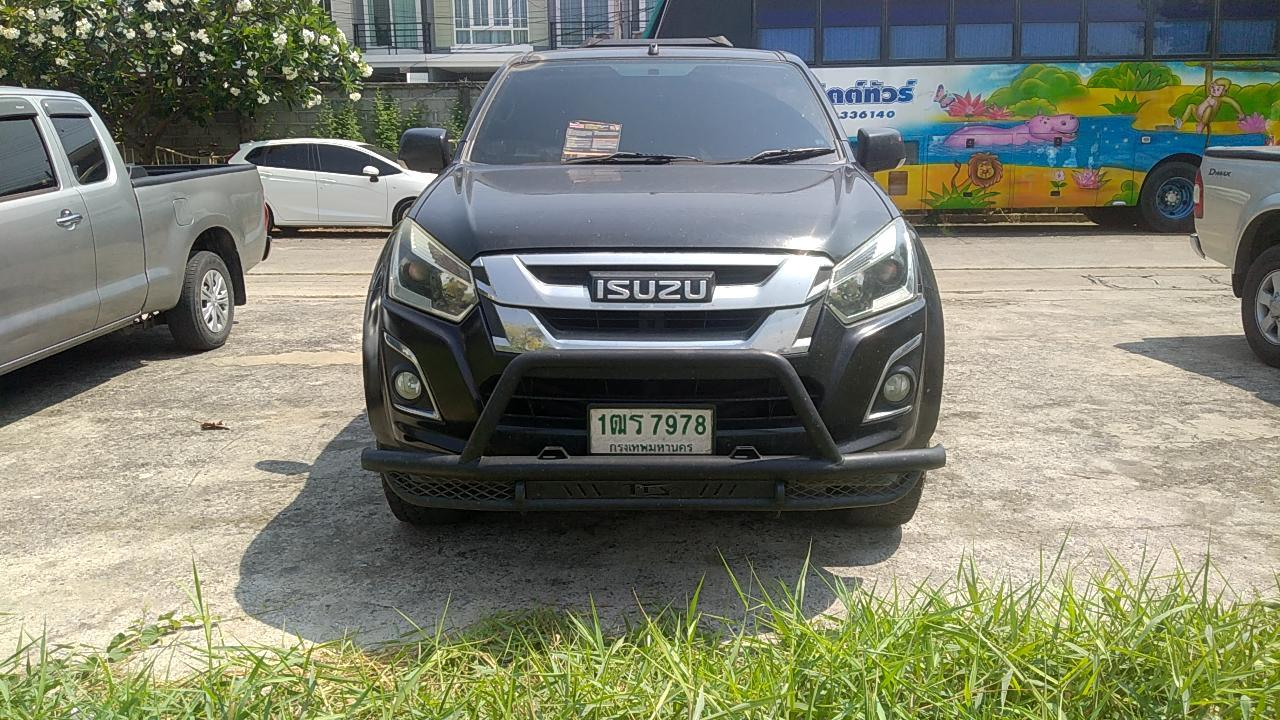

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/10_large_45.jpeg: 384x640 2 cars, 1 bus, 2 trucks, 26.8ms
Speed: 1.7ms preprocess, 26.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 10_large_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/10_large_45.jpeg
File Name: 10_large_45.jpeg
Confidence: 0.944349467754364
Coordinate: [271.6639404296875, 71.56866455078125, 1154.9229736328125, 588.8953247070312]



0: 640x640 large 1.00, small 0.00, medium 0.00, 20.8ms
Speed: 4.2ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 1.0
Car width: 1.8, Car length: 5
Predicted Distance: 2.0977099512471313
Naive small Distance: 1.8817692209716912
Naive medium Distance: 1.9434665724789595


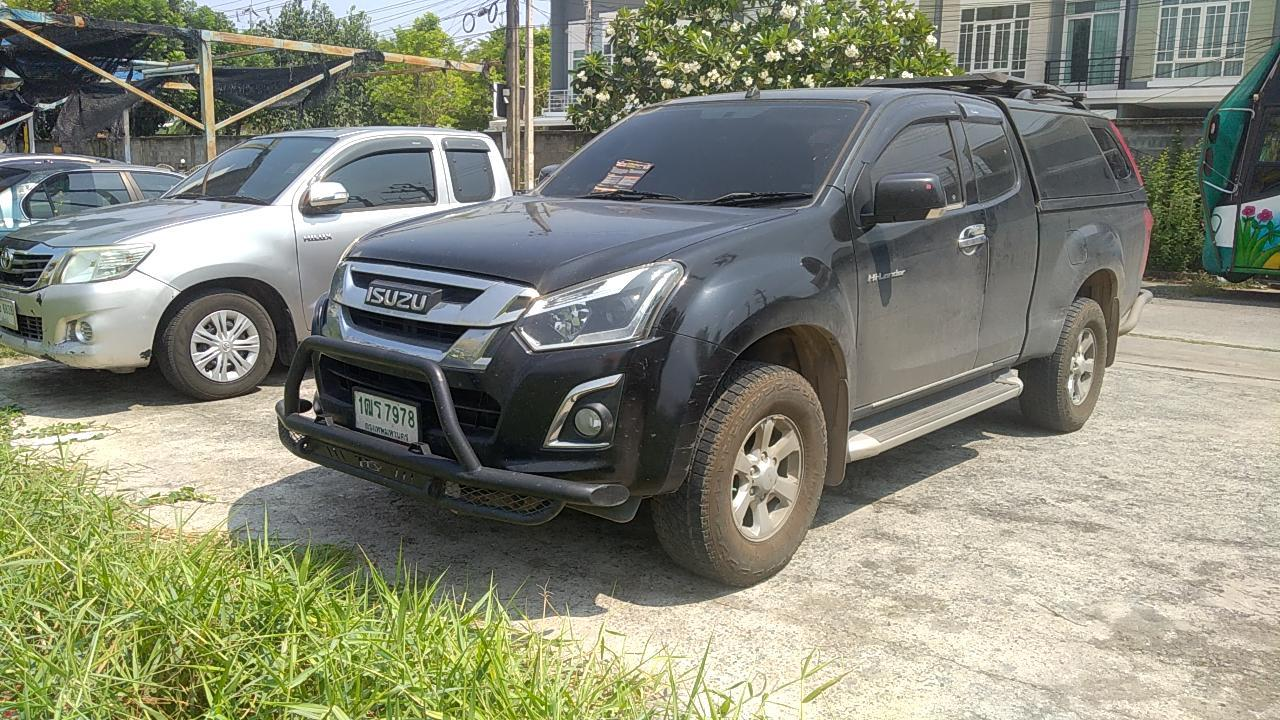

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/11_large_0.jpeg: 384x640 1 truck, 26.7ms
Speed: 1.7ms preprocess, 26.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 11_large_0.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/11_large_0.jpeg
File Name: 11_large_0.jpeg
Confidence: 0.9264233708381653
Coordinate: [249.2086181640625, 154.094970703125, 1027.076171875, 584.0955200195312]



0: 640x640 large 0.99, small 0.00, medium 0.00, 20.8ms
Speed: 4.2ms preprocess, 20.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 0.9933352470397949
Car width: 1.8, Car length: 5
Predicted Distance: 1.036987657504208
Naive small Distance: 0.9217668066704072
Naive medium Distance: 1.036987657504208


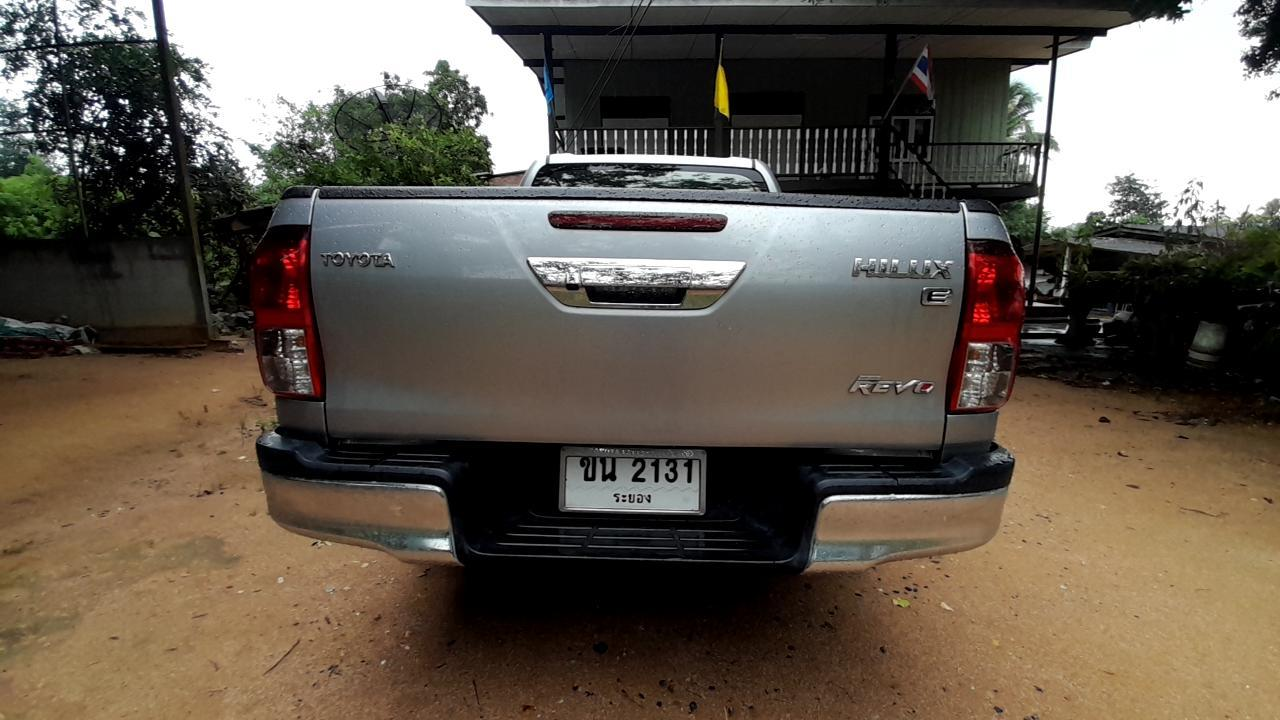

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/12_large_45.jpeg: 384x640 1 car, 1 truck, 26.9ms
Speed: 1.6ms preprocess, 26.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 12_large_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/12_large_45.jpeg
File Name: 12_large_45.jpeg
Confidence: 0.876720666885376
Coordinate: [272.5772705078125, 129.681884765625, 966.7139892578125, 579.9014892578125]



0: 640x640 large 1.00, medium 0.00, small 0.00, 20.7ms
Speed: 4.3ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: large, confidence: 1.0
Car width: 1.8, Car length: 5
Predicted Distance: 2.6692454162268398
Naive small Distance: 2.394470152791724
Naive medium Distance: 2.4729773709160425


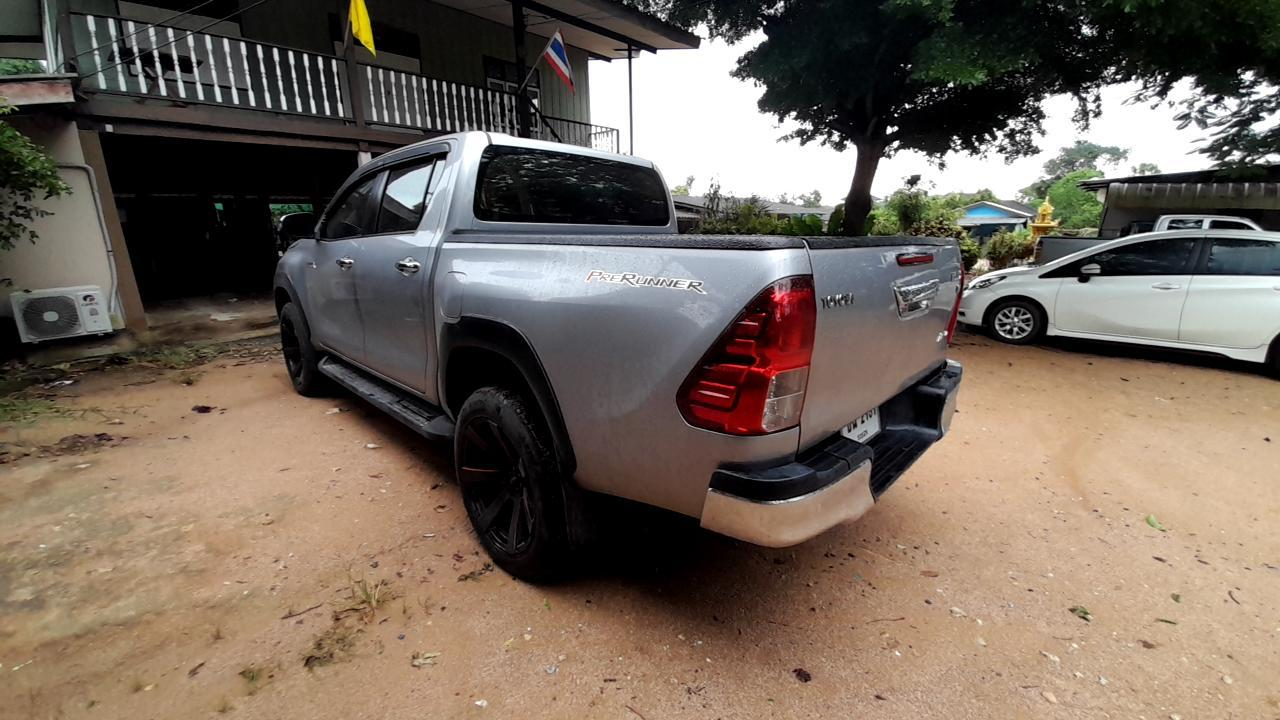

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/13_medium_45.jpeg: 384x640 1 car, 1 motorcycle, 26.7ms
Speed: 1.7ms preprocess, 26.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 13_medium_45.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/13_medium_45.jpeg
File Name: 13_medium_45.jpeg
Confidence: 0.9647290110588074
Coordinate: [242.990478515625, 84.23237609863281, 1021.1812744140625, 559.3651123046875]



0: 640x640 medium 1.00, small 0.00, large 0.00, 20.7ms
Speed: 4.0ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: medium, confidence: 0.9991336464881897
Car width: 1.8, Car length: 4.5
Predicted Distance: 2.2058656355180295
Naive small Distance: 2.1358381550253935
Naive medium Distance: 2.2058656355180295


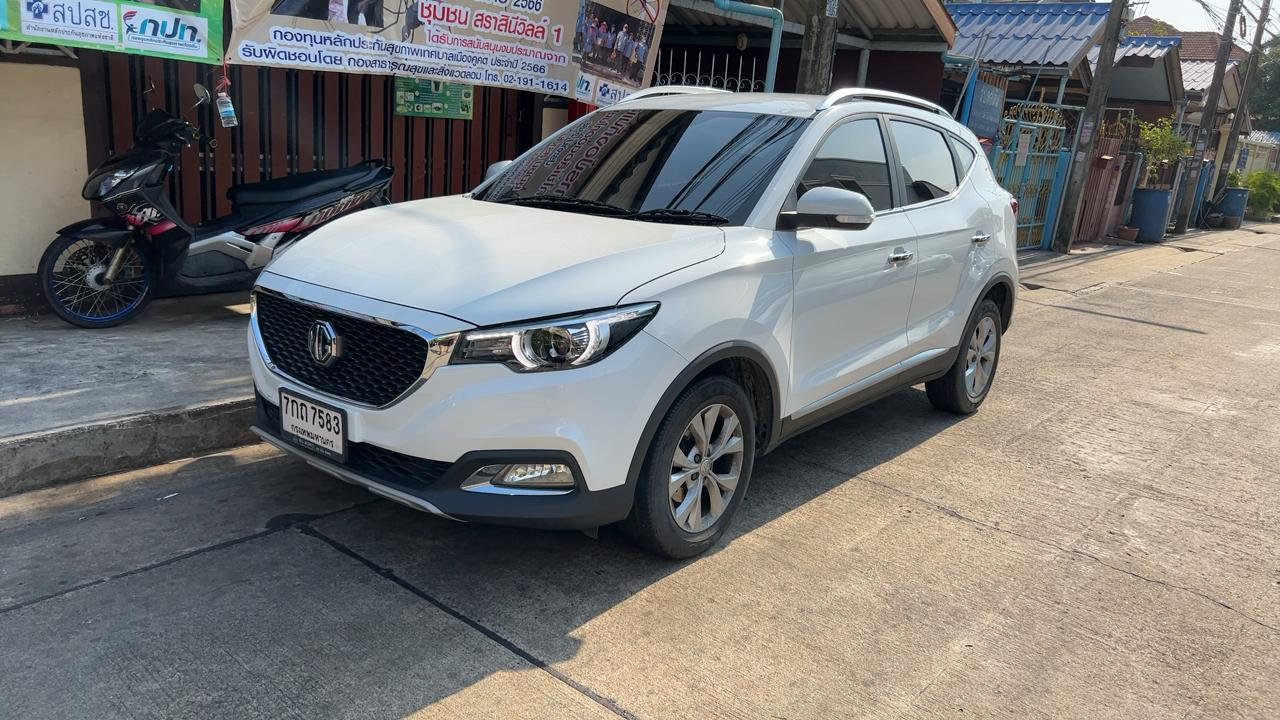

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/34_medium_90.jpeg: 384x640 2 persons, 1 car, 26.7ms
Speed: 1.8ms preprocess, 26.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 34_medium_90.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/34_medium_90.jpeg
File Name: 34_medium_90.jpeg
Confidence: 0.9418638944625854
Coordinate: [3.33349609375, 62.66180419921875, 1275.207763671875, 600.9555053710938]



0: 640x640 medium 0.66, small 0.34, large 0.00, 20.7ms
Speed: 4.2ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: medium, confidence: 0.6608240604400635
Car width: 1.8, Car length: 4.5
Predicted Distance: 1.585532225055563
Naive small Distance: 1.585532225055563
Naive medium Distance: 1.585532225055563


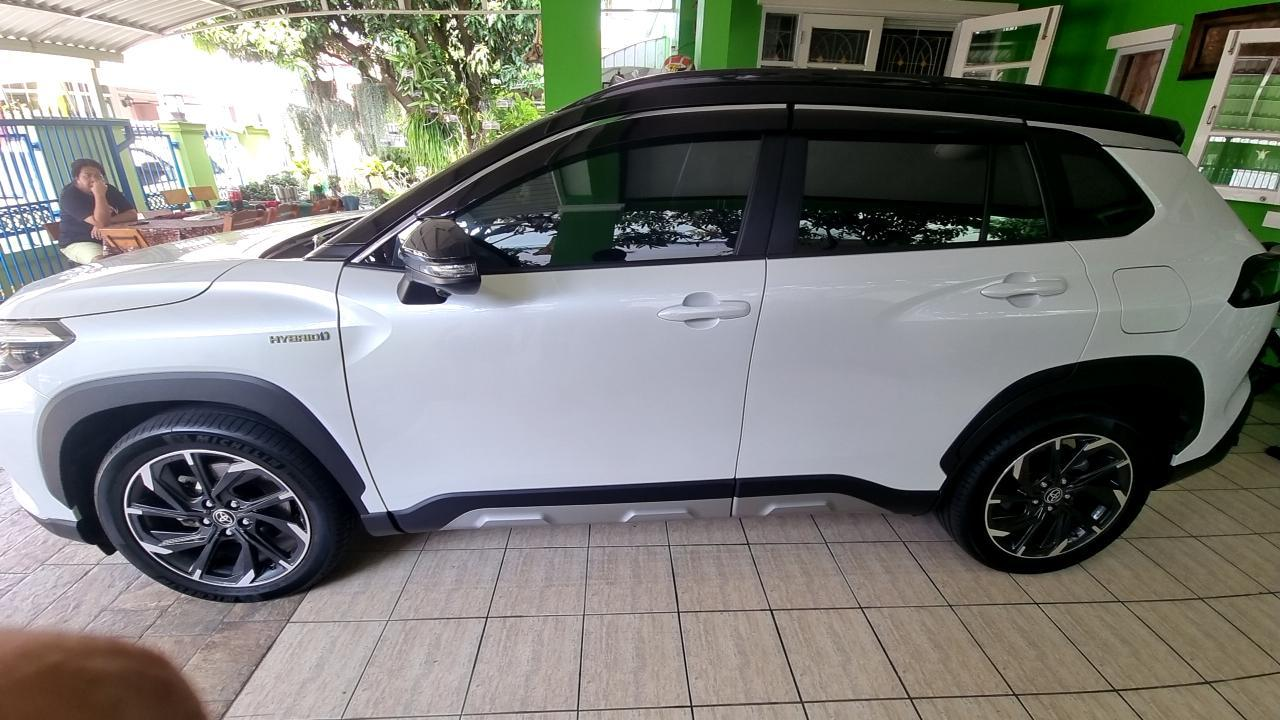

/content/drive/MyDrive/car-distance/runs/test



image 1/1 /content/drive/MyDrive/car-distance/raw_data/test_dataset/35_small_0.jpeg: 384x640 1 person, 2 cars, 26.6ms
Speed: 1.5ms preprocess, 26.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/car-distance/runs/test


Moved 35_small_0.jpeg to /content/drive/MyDrive/car-distance/raw_data/car_images/35_small_0.jpeg
File Name: 35_small_0.jpeg
Confidence: 0.9330691695213318
Coordinate: [345.951171875, 64.67884826660156, 948.3096923828125, 571.0679931640625]



0: 640x640 small 0.99, medium 0.01, large 0.00, 20.7ms
Speed: 4.0ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


Predicted class: small, confidence: 0.9913080334663391
Car width: 1.6, Car length: 4.5
Predicted Distance: 1.1903418044188363
Naive small Distance: 1.1903418044188363
Naive medium Distance: 1.3391345299711908


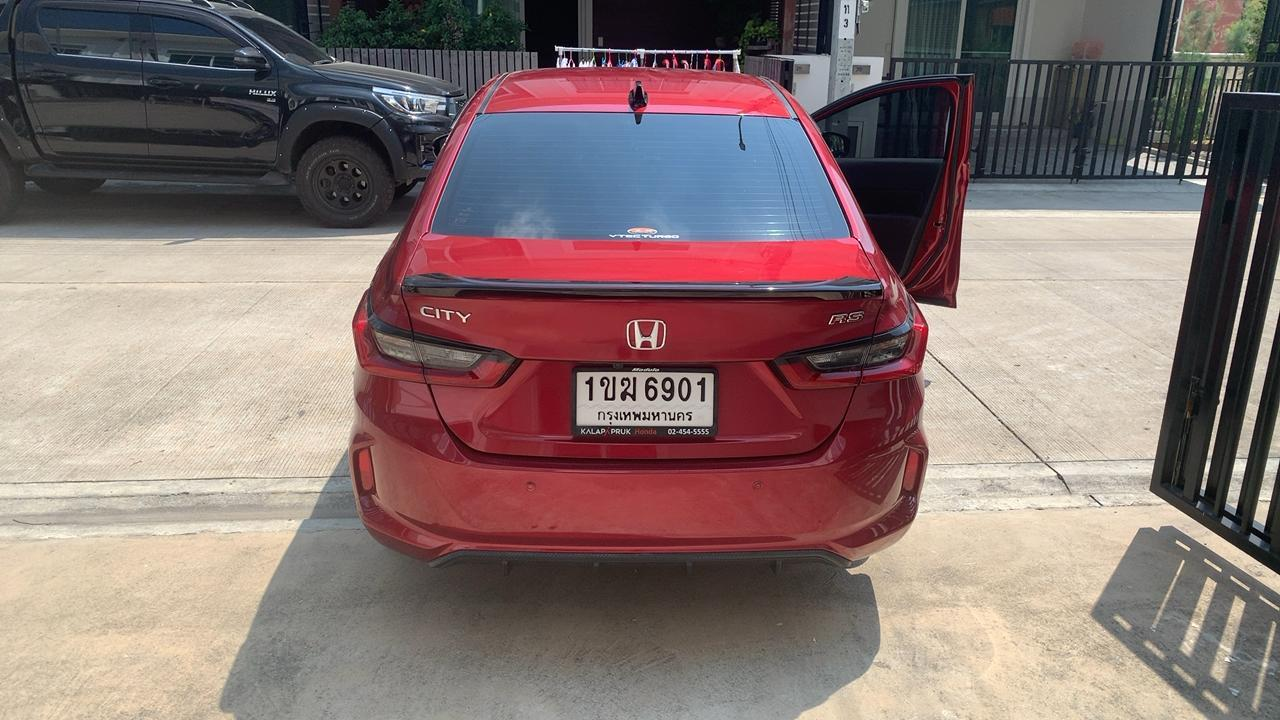

In [13]:
os.chdir('/content/drive/MyDrive/car-distance')
HOME = os.getcwd()
CLASS_ID = [2, 5, 7]
CUSTOM_TRAIN_MODEL_NAME = 'train7'
CUSTOM_VAL_MODEL_NAME = 'val7'

class Setup():
    def __init__(self):
        self.validate_gpu_connection()
        self.ensure_required_folders_exist()

    def validate_gpu_connection(self):
      gpu_info = run(['nvidia-smi'], capture_output=True, text=True).stdout
      if 'failed' in gpu_info:
          print('Not connected to a GPU')
      else:
          print(gpu_info)

    def ensure_required_folders_exist(self):
        required_folders = [
            f'{HOME}/raw_data',
            f'{HOME}/raw_data/car_images',
            f'{HOME}/runs/detect',
            f'{HOME}/runs/detect/cropped',
            f'{HOME}/runs/classify'
            f'{HOME}/runs/classify/predict'
        ]

        for folder_path in required_folders:
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
                print(f"Folder {folder_path} created.")
            else:
                print(f"Folder {folder_path} already exists.")

class DatasetCreator():
  def __init__(self):
    self.setup = Setup()
    self.model_handler = ModelHandler()
    self.image_manager = ImageManager()
    self.object_detector = ObjectDetector(self.image_manager, self.model_handler)

  def main(self):
      df = self.image_manager.fetch_image_data()
      existing_files = set(os.listdir(f'{HOME}/raw_data/car_images'))
      available_ids = [id for id in df['id'].unique() if id not in existing_files]

      df = df[df['id'].isin(available_ids)]

      df = self.image_manager.sample_groups_from_dataframe(df, n_groups=1, n_samples_per_group=1)

      image_links = [img_link for id in df['id'].unique() for img_link in df[df['id'] == id]['linkimage'].tolist()]

      detections = self.object_detector.perform_object_detection(image_links, save=True)
      detection_df = self.object_detector.postprocess_detection_results(detections)
      self.image_manager.crop_images_based_on_detection(detection_df)

class ImageManager():
    def move_jpeg_images(self, source_folder, destination_folder):
      for filename in os.listdir(source_folder):
          if filename.lower().endswith(('.jpg', '.jpeg')):
              source_path = os.path.join(source_folder, filename)
              destination_path = os.path.join(destination_folder, filename)

              shutil.move(source_path, destination_path)
              print(f"Moved {filename} to {destination_path}")

    def fetch_image_data(self, mode=None):
        df = pd.read_csv(f'{HOME}/raw_data/list_of_images.csv')
        df = df[df['status'] == 'Approved']

        if mode == 'test':
          existing_files = pd.read_csv(f'{HOME}/raw_data/existing_files.csv')
          existing_files = existing_files['filename'].tolist()
          available_ids = [id for id in df['id'].unique() if id not in existing_files]
          df = df[df['id'].isin(available_ids)]

        dict_size = {'มุมหน้ารถ':0,
             'มุมหน้ารถด้านซ้าย (45 ํ)':45,
             'มุมข้างรถซ้ายตรง':90,
             'มุมท้ายรถ':0,
             'มุมท้ายรถด้านซ้าย (45 ํ)':45,
             'มุมท้ายรถด้านขวา (45 ํ)':45,
             'มุมข้างรถขวาตรง':90,
             'มุมหน้ารถด้านขวา (45 ํ)':45}
        df = df.loc[df.angle.isin(dict_size.keys())]
        df['angle'] = df.angle.map(dict_size)

        return df

    def sample_groups_from_dataframe(self, df, n_groups=2, n_samples_per_group=None):
        unique_ids = df['id'].drop_duplicates().sample(n_groups)
        df_sample = pd.concat([df[df['id'] == id] if n_samples_per_group is None else df[df['id'] == id].sample(n_samples_per_group) for id in unique_ids])

        return df_sample

    def crop_images_based_on_detection(self, df, save=True):
      for index, row in df.iterrows():
          print('File Name:', row['file_name'])
          print('Confidence:', row['confidence'])
          print('Coordinate:', row['coordinate'])

          with PILImage.open(f'{HOME}/raw_data/car_images/{row["file_name"]}') as img:
              left, top, right, bottom = row['coordinate']

              cropped_img = img.crop((left, top, right, bottom))

              if cropped_img.mode == 'RGBA':
                  cropped_img = cropped_img.convert('RGB')

              if save:
                cropped_img.save(f'{HOME}/runs/detect/cropped/{row["file_name"]}')

              return cropped_img

class CarSizeTrainer():
  def __init__(self):
      self.setup = Setup()
      self.model_handler = ModelHandler()
      self.image_manager = ImageManager()
      self.object_detector = ObjectDetector(self.image_manager, self.model_handler)

  def load_labeled_data(self):
      !mkdir {HOME}/raw_data/car_size_v4
      %cd {HOME}/raw_data/car_size_v4
      rf = Roboflow(api_key="kCevZjGcG1U2ATXwh1Of")
      project = rf.workspace("iiv-1vmwm").project("car-size-classification")
      dataset = project.version(5).download("folder")

  def validate(self):
      model = self.model_handler.load_model('custom')
      metrics = model.val()  # no arguments needed, dataset and settings remembered
      print(metrics)

  def main(self):
      # self.load_labeled_data()
      dataset = f'{HOME}/raw_data/car_size_v4/Car-Size-Classification-4'
      model = self.model_handler.load_model('classify')
      model.train(data=dataset, epochs=30, imgsz=640, plots=True)
      self.validate()

class CarSizePredictor():
    def __init__(self, image_manager, object_detector):
      self.model_handler = ModelHandler()
      self.image_manager = image_manager
      self.object_detector = object_detector

    def get_dimensions_based_on_class(self, class_name):
        dimension_mapping = {
            "small": {"car_w": 1.6, "car_l": 4.5},
            "medium": {"car_w": 1.8, "car_l": 4.5},
            "large": {"car_w": 1.8, "car_l": 5}
        }
        return dimension_mapping.get(class_name, {"car_w": None, "car_l": None})

    def predict_car_size(self, img_url):
      car_w = 1.8
      car_l = 4.5

      detections = self.object_detector.perform_object_detection([img_url], NAME='runs/test', save=True, source_folder=f'{HOME}/runs/test')
      # detections = self.object_detector.perform_object_detection([img_url], NAME='runs/test', save=False)
      detection_df = self.object_detector.postprocess_detection_results(detections)
      cropped_img = self.image_manager.crop_images_based_on_detection(detection_df, save=False)

      model = self.model_handler.load_model('custom')
      results = model.predict(cropped_img)
      names_dict = results[0].names
      probs = results[0].probs.data.tolist()
      predicted_class = names_dict[np.argmax(probs)]
      conf = max(probs)
      car_size = self.get_dimensions_based_on_class(predicted_class)
      car_w = car_size["car_w"]
      car_l = car_size["car_l"]

      print(f'Predicted class: {predicted_class}, confidence: {conf}')

      return detections, car_w, car_l

class ObjectDetector():
  def __init__(self, image_manager, model_handler):
        self.image_manager = image_manager
        self.model_handler = model_handler

  def perform_object_detection(self, img_paths, NAME='runs/detect', save=True, source_folder=f'{HOME}'):
        print(source_folder)
        result_pred = []
        model = self.model_handler.load_model('detect')
        for img in img_paths:
            resutls = model(img, stream=True)
            result_pred.append(model.predict(img, save=save, conf=0.5, project=HOME, name=NAME, exist_ok=True))

        self.image_manager.move_jpeg_images(source_folder=source_folder, destination_folder=f'{HOME}/raw_data/car_images')
        return result_pred

  def postprocess_detection_results(self, result_pred):
        data = []

        for result in result_pred:
            file_path = result[0].path.split("/")[-1]
            boxes = result[0].boxes
            box_cls = boxes.cls.tolist()
            box_conf = boxes.conf.tolist()
            box_xyxy = boxes.xyxy.tolist()

            if not box_cls:
                data.append((file_path, float('nan'), float('nan'), float('nan'),  float('nan'),))
            else:
                data.extend(
                    (file_path, conf, xyxy, cls, result[0].names[cls]) for conf, xyxy, cls in zip(box_conf, box_xyxy, box_cls))

        file_name, confi, coor, class_id, class_name = zip(*data)

        df = pd.DataFrame({
            "file_name": file_name,
            "confidence": confi,
            "coordinate": coor,
            "class_id": class_id,
            "class_name": class_name
        })

        df = df[df['class_id'].isin(CLASS_ID)]
        df = df.dropna()
        df['class_id'] = df['class_id'].fillna(-1)
        df['class_id'] = df['class_id'].astype(int)
        df['area'] = df['coordinate'].apply(lambda coords: (coords[2] - coords[0]) * (coords[3] - coords[1]))
        df = df.sort_values('area', ascending=False)
        df = df.drop_duplicates('file_name', keep='first')

        return df

class ModelHandler():
  def load_model(self, task='detect'):
        if task == 'detect':
            model = YOLO(f"yolov8m.pt")
        elif task == 'classify':
            model = YOLO('yolov8m-cls.yaml').load('yolov8m-cls.pt')  # build from YAML and transfer weights
        elif task == 'custom':
            model = YOLO(f'{HOME}/runs/classify/{CUSTOM_TRAIN_MODEL_NAME}/weights/best.pt')  # load a custom model
        else:
            raise ValueError(f"Unknown task: {task}")

        return model

  def get_performance(self):
    print("-------------------------------------------------- Train Results --------------------------------------------------")
    !cat {HOME}/runs/classify/{CUSTOM_TRAIN_MODEL_NAME}/results.csv | head -30
    display(Image(filename=f'{HOME}/runs/classify/{CUSTOM_TRAIN_MODEL_NAME}/results.png', width=640))
    display(Image(filename=f'{HOME}/runs/classify/{CUSTOM_TRAIN_MODEL_NAME}/confusion_matrix_normalized.png', width=640))
    print("-------------------------------------------------- Validation Results --------------------------------------------------")
    display(Image(filename=f'{HOME}/runs/classify/{CUSTOM_VAL_MODEL_NAME}/confusion_matrix_normalized.png', width=640))
    display(Image(filename=f'{HOME}/runs/classify/{CUSTOM_VAL_MODEL_NAME}/val_batch2_pred.jpg', width=640))

class CarDistanceEstimator():
    def __init__(self):
      self.setup = Setup()
      self.model_handler = ModelHandler()
      self.image_manager = ImageManager()
      self.object_detector = ObjectDetector(self.image_manager, self.model_handler)
      self.car_size_predictor = CarSizePredictor(self.image_manager, self.object_detector)

    def calulate_distance(self, y, car_w, car_l, angle, camera_angle = 110):
      camera_angle = camera_angle/180*np.pi
      angle = angle%180

      if angle == 0:
          L = car_w
      elif (angle == 45) or (angle == 135):
          L = (car_w*0.707+car_l*0.707)*0.86
      elif angle == 90:
          L = car_l
      else:
          L = np.nan
      car_sizes = []
      for box in  y[0]:
          if box.boxes[0].cls[0].cpu().numpy() in CLASS_ID:
              xywhn = box.boxes[0].xywhn.cpu().numpy()
              box_size = xywhn[0][2]*xywhn[0][3]
          else:
              box_size = 0
          car_sizes.append(box_size)

      if len(np.where(np.array(car_sizes)>0)[0])>0:
          ind = np.where(car_sizes==max(car_sizes))[0][0]
          yy =  y[0][ind]
          portion = yy.boxes[0].xywhn.cpu().numpy()[0][2]
          distance = L/portion/2/np.tan(camera_angle/2)
      else:
          distance = np.nan
      return distance

    def main(self):
        df = self.image_manager.fetch_image_data(mode='test')
        df_sample = self.image_manager.sample_groups_from_dataframe(df, n_groups=20, n_samples_per_group=2)

        predicted_results = []
        naive_small_results = []
        naive_medium_results = []
        for index, row in df_sample.iterrows():
            img_url = row['linkimage']
            response = requests.get(img_url)
            image = PILImage.open(BytesIO(response.content)).convert('RGB')
            result_pred, car_w, car_l = self.car_size_predictor.predict_car_size(img_url)
            distance = self.calulate_distance(
                  result_pred[0],
                  car_w=car_w,
                  car_l=car_l,
                  angle = int(row.angle),
                  camera_angle=110
              )

            naive_small_distance = self.calulate_distance(
                  result_pred[0],
                  car_w=1.6,
                  car_l=4.5,
                  angle = int(row.angle),
                  camera_angle=110
              )

            naive_medium_distance = self.calulate_distance(
                  result_pred[0],
                  car_w=1.8,
                  car_l=4.5,
                  angle = int(row.angle),
                  camera_angle=110
              )

            print(f'Car width: {car_w}, Car length: {car_l}')
            print(f"Predicted Distance: {distance}")
            print(f"Naive small Distance: {naive_small_distance}")
            print(f"Naive medium Distance: {naive_medium_distance}")
            predicted_results.append(distance)
            naive_small_results.append(naive_small_distance)
            naive_medium_results.append(naive_medium_distance)

            img_io = BytesIO()
            image.save(img_io, format='JPEG')
            img_io.seek(0)
            display(Image(data=img_io.read(), width=640))

        return predicted_results, naive_small_results, naive_medium_results

    def validate_with_test_data(self):
        predicted_results = []
        naive_small_results = []
        naive_medium_results = []

        files = glob.glob(f'{HOME}/raw_data/test_dataset/*.jpg') + glob.glob(f'{HOME}/raw_data/test_dataset/*.jpeg')


        for file in files:
          image = PILImage.open(file).convert('RGB')
          result_pred, car_w, car_l = self.car_size_predictor.predict_car_size(file)
          filename = file.split('/')[-1] # extract filename from file path
          angle = filename.split('_')[-1].split('.')[0] # split by underscore and get the last element, then remove the extension
          distance = self.calulate_distance(
                result_pred[0],
                car_w=car_w,
                car_l=car_l,
                angle = int(angle),
                camera_angle=110
            )

          naive_small_distance = self.calulate_distance(
                result_pred[0],
                car_w=1.6,
                car_l=4.5,
                angle = int(angle),
                camera_angle=110
            )

          naive_medium_distance = self.calulate_distance(
                result_pred[0],
                car_w=1.8,
                car_l=4.5,
                angle = int(angle),
                camera_angle=110
            )

          print(f'Car width: {car_w}, Car length: {car_l}')
          print(f"Predicted Distance: {distance}")
          print(f"Naive small Distance: {naive_small_distance}")
          print(f"Naive medium Distance: {naive_medium_distance}")
          predicted_results.append(distance)
          naive_small_results.append(naive_small_distance)
          naive_medium_results.append(naive_medium_distance)

          img_io = BytesIO()
          image.save(img_io, format='JPEG')
          img_io.seek(0)
          display(Image(data=img_io.read(), width=640))

        return predicted_results, naive_small_results, naive_medium_results

if __name__ == '__main__':
    # data = DatasetCreator()
    # data.main()
    # train = CarSizeTrainer()
    # train.main()
    # model = ModelHandler()
    # model.get_performance()
    distance = CarDistanceEstimator()
    # predicted_results, naive_small_results, naive_medium_results = distance.main()
    predicted_test_results, naive_test_small_results, naive_test_medium_results = distance.validate_with_test_data()

In [ ]:
predicted_test_results, naive_test_small_results, naive_test_medium_results

df = pd.DataFrame({
    'predicted': predicted_test_results,
    'actual': predicted_test_results,
    'naive_small': naive_test_small_results,
    'naive_medium': naive_test_medium_results
})
df.to_csv(f'{HOME}/results/test_dataset_results.csv')

NameError: ignored

In [ ]:
regression_df = pd.read_csv(f'{HOME}/results/test_dataset_results.csv')
regression_df.columns

Index(['Unnamed: 0', 'predicted', 'actual', 'naive_small', 'naive_medium'], dtype='object')

In [ ]:
len(regression_df)

34

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_true, y_pred):
    """Calculate evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return mse, rmse, mae, r2, mape

def print_metrics(mse, rmse, mae, r2, mape):
    """Print evaluation metrics."""
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R2 Score): {r2}")

# Calculate and print metrics
print("------------------- predicted -------------------")
mse, rmse, mae, r2, mape = calculate_metrics(regression_df['actual'].tolist(), regression_df['predicted'])
print_metrics(mse, rmse, mae, r2, round(mape))
print("------------------- Naive small -------------------")
mse, rmse, mae, r2, mape = calculate_metrics(regression_df['actual'].tolist(), regression_df['naive_small'])
print_metrics(mse, rmse, mae, r2, round(mape))
print("------------------- Naive medium -------------------")
mse, rmse, mae, r2, mape = calculate_metrics(regression_df['actual'].tolist(), regression_df['naive_medium'])
print_metrics(mse, rmse, mae, r2, round(mape))

------------------- predicted -------------------
Mean Squared Error (MSE): 0.006878180809529942
Root Mean Squared Error (RMSE): 0.08293479854397635
Mean Absolute Error (MAE): 0.027129040281317063
Mean Absolute Percentage Error (MAPE): 1%
R-squared (R2 Score): 0.9909248380768162
------------------- Naive small -------------------
Mean Squared Error (MSE): 0.04168879596749356
Root Mean Squared Error (RMSE): 0.20417834353205425
Mean Absolute Error (MAE): 0.1559515562613773
Mean Absolute Percentage Error (MAPE): 6%
R-squared (R2 Score): 0.944995256120138
------------------- Naive medium -------------------
Mean Squared Error (MSE): 0.023547846853165286
Root Mean Squared Error (RMSE): 0.15345307704039463
Mean Absolute Error (MAE): 0.10671696660194853
Mean Absolute Percentage Error (MAPE): 5%
R-squared (R2 Score): 0.9689306621834192


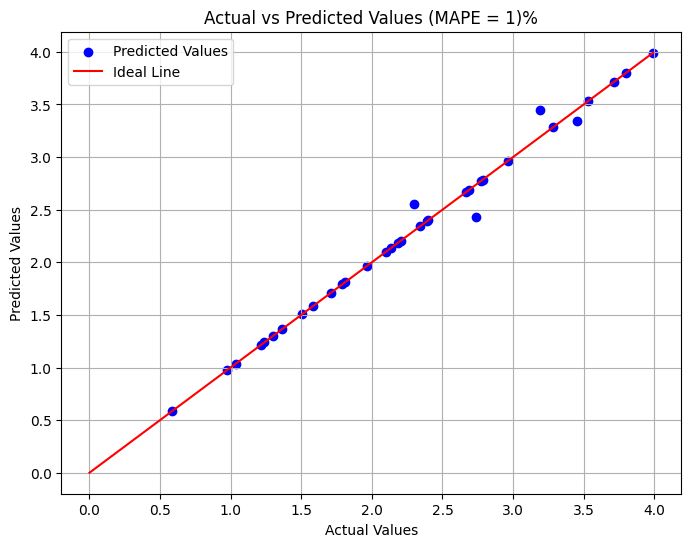

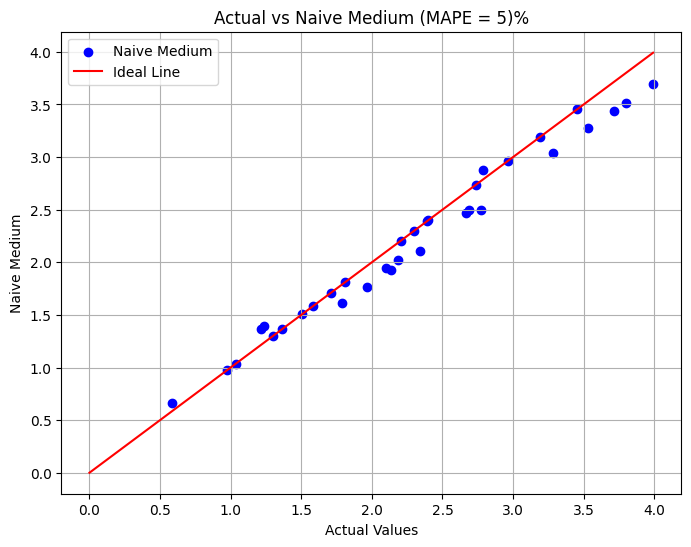

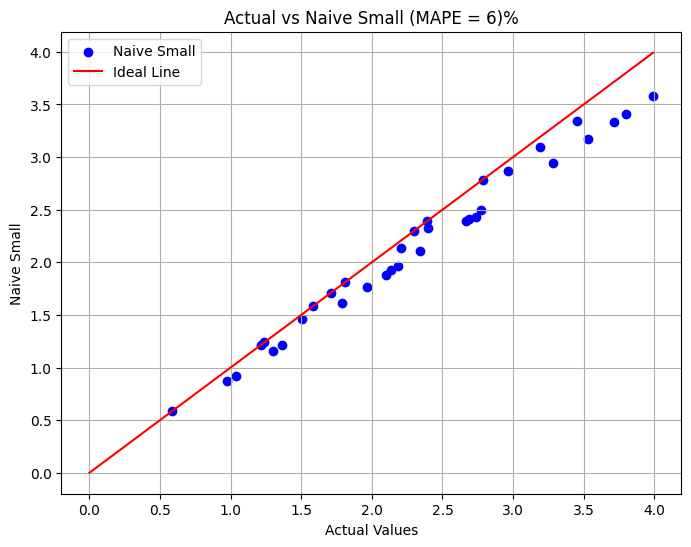

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def plot_actual_vs_predicted(y_true, y_pred, title):
    """Plot actual vs predicted values and display MAPE value."""

    # Calculate mape score
    mape = mean_absolute_percentage_error(y_true, y_pred)

    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(y_true, y_pred, color='blue', label=title)

    # Ideal line where y_true = y_pred
    max_val = max(max(y_true), max(y_pred))
    plt.plot([0, max_val], [0, max_val], color='red', label='Ideal Line')

    plt.title(f'Actual vs {title} (MAPE = {round(mape)})%')
    plt.xlabel('Actual Values')
    plt.ylabel(f'{title}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you already have your 'actual' and 'naive_medium' values in regression_df
plot_actual_vs_predicted(regression_df['actual'].tolist(), regression_df['predicted'],title='Predicted Values')
plot_actual_vs_predicted(regression_df['actual'].tolist(), regression_df['naive_medium'],title='Naive Medium')
plot_actual_vs_predicted(regression_df['actual'].tolist(), regression_df['naive_small'],title='Naive Small')


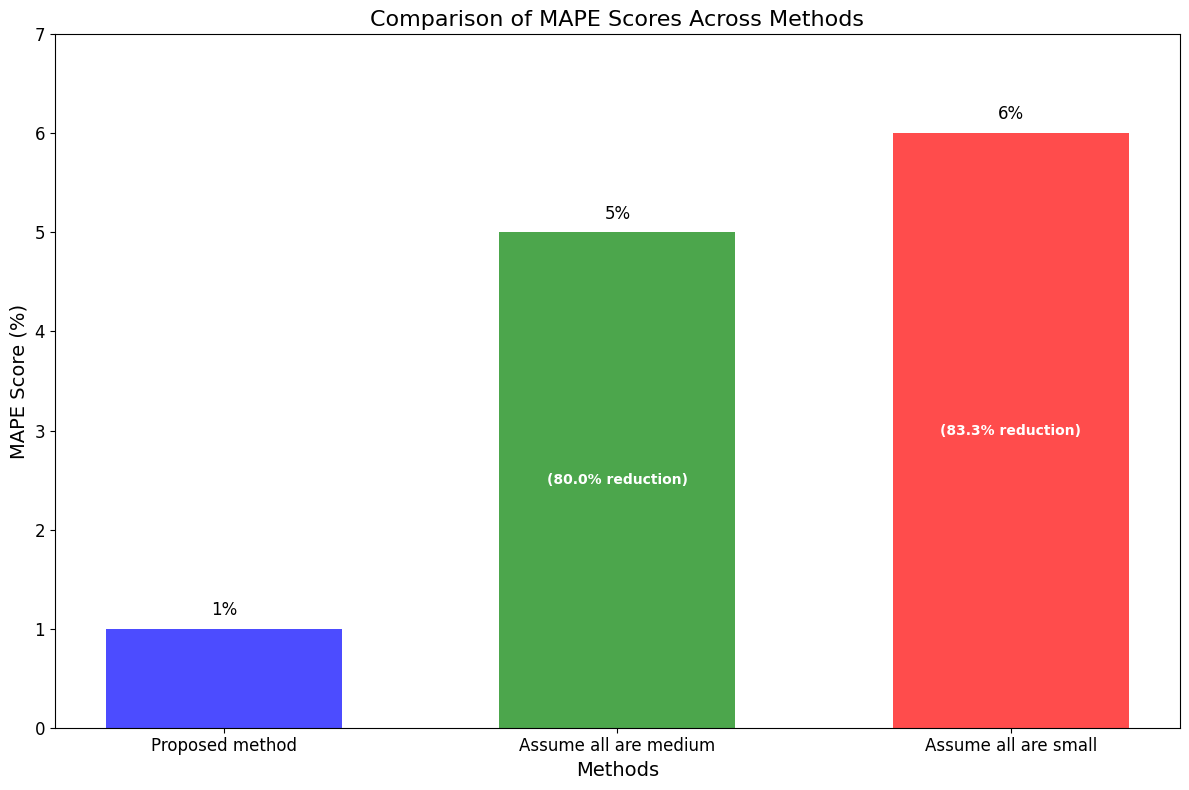

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample MAPE scores for different methods
methods_mape_scores = {
    'Proposed method': 1,
    'Assume all are medium': 5,
    'Assume all are small': 6
}

# Extracting data for plotting
methods = list(methods_mape_scores.keys())
scores = list(methods_mape_scores.values())

# Compute percentage reductions
proposed_mape = methods_mape_scores['Proposed method']
reductions = {
    method: ((mape - proposed_mape) / mape) * 100 for method, mape in methods_mape_scores.items() if "Assume" in method
}

# Configuring the bar positions and width
bar_positions = np.arange(len(methods))
bar_width = 0.6

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
colors = ['blue', 'green', 'red']
bars = ax.bar(bar_positions, scores, bar_width, align='center', alpha=0.7, color=colors)

# Annotating the bars with their values and percentage reductions
for i, bar in enumerate(bars):
    method = methods[i]
    y_val = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, y_val + 0.1, f"{int(y_val)}%",
            ha='center', va='bottom', fontsize=12)

    if method in reductions:
        reduction_text = f"({reductions[method]:.1f}% reduction)"
        ax.text(bar.get_x() + bar.get_width()/2, y_val/2, reduction_text,
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Labeling and titling with adjusted font sizes
ax.set_xlabel('Methods', fontsize=14)
ax.set_ylabel('MAPE Score (%)', fontsize=14)
ax.set_title('Comparison of MAPE Scores Across Methods', fontsize=16)
ax.set_xticks(bar_positions)
ax.set_xticklabels(methods, fontsize=12)  # Adjust x-tick label font size here
ax.tick_params(axis='y', labelsize=12)    # Adjust y-tick label font size here
ax.set_ylim(0, max(scores) + 1)

# Displaying the plot
plt.tight_layout()
plt.show()


In [ ]:
# predicted_test_results, naive_test_small_results, naive_test_medium_results = distance.validate_with_test_data()

In [ ]:
# display(Image(filename=f'{HOME}/runs/classify/{CUSTOM_TRAIN_MODEL_NAME}/confusion_matrix.png', width=640))
# display(Image(filename=f'{HOME}/runs/classify/{CUSTOM_VAL_MODEL_NAME}/confusion_matrix.png', width=640))

In [ ]:
predicted_results, naive_small_results, naive_medium_results = distance.main()
predicted_test_results, naive_test_small_results, naive_test_medium_results = distance.validate_with_test_data()

In [ ]:
predicted = predicted_results + predicted_test_results
actual = predicted
naive_small = naive_small_results+naive_test_small_results
naive_medium = naive_medium_results+naive_test_medium_results

In [ ]:
df = pd.DataFrame({
    'predicted': predicted,
    'actual': actual,
    'naive_small': naive_small,
    'naive_medium': naive_medium
})

In [ ]:
df.to_csv(f'{HOME}/results/new_results.csv')

In [ ]:
df = pd.read_csv(f'{HOME}/results/new_results.csv')

## Regression analysis

In [ ]:
regression_df = pd.read_csv(f'{HOME}/results/results.csv')

In [ ]:
regression_df.columns

Index(['predicted', 'actual', 'naive_small', 'naive_medium'], dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_true, y_pred):
    """Calculate evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return mse, rmse, mae, r2, mape

def print_metrics(mse, rmse, mae, r2, mape):
    """Print evaluation metrics."""
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R2 Score): {r2}")

In [ ]:
# Calculate and print metrics
mse, rmse, mae, r2, mape = calculate_metrics(regression_df['actual'].tolist(), regression_df['naive_small'])
print_metrics(mse, rmse, mae, r2, mape)

Mean Squared Error (MSE): 0.020156239285066848
Root Mean Squared Error (RMSE): 0.1419726709091114
Mean Absolute Error (MAE): 0.08844597096464056
Mean Absolute Percentage Error (MAPE): 4.693341388843111%
R-squared (R2 Score): 0.9465777198334488


In [ ]:
# Calculate and print metrics
mse, rmse, mae, r2 = calculate_metrics(regression_df['actual'], regression_df['naive_small'])
print_metrics(mse, rmse, mae, r2)

Mean Squared Error (MSE): 0.020156239285066848
Root Mean Squared Error (RMSE): 0.1419726709091114
Mean Absolute Error (MAE): 0.08844597096464056
R-squared (R2 Score): 0.9465777198334488


In [ ]:
# Calculate and print metrics
mse, rmse, mae, r2 = calculate_metrics(regression_df['actual'].tolist(), regression_df['naive_medium'])
print_metrics(mse, rmse, mae, r2)

Mean Squared Error (MSE): 0.014384715009438836
Root Mean Squared Error (RMSE): 0.11993629562996698
Mean Absolute Error (MAE): 0.08205771364178394
R-squared (R2 Score): 0.9618746203355718
